# 클러스터링 분석

## K-means, GMM, Spectral, HDBSCAN 클러스터링 적용

## XAI 해석 (SHAP, LIME, Permutation Importance 적용)

### 사용할 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
# macOS에서 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스(-)가 깨질 수 있는 것을 방지함
plt.rcParams['axes.unicode_minus'] = False


### 데이터 불러오기 (window별 데이터)

In [3]:
# 절대경로로 불러옴
df_2020_2022 = pd.read_csv("../csv/financial_data_window_2020_2022.csv")
df_2021_2023 = pd.read_csv("../csv/financial_data_window_2021_2023.csv")
df_2022_2024 = pd.read_csv("../csv/financial_data_window_2022_2024.csv")

# 기업명을 따로 저장한 후, feature만 따로 분리함
company_2020_2022 = df_2020_2022['기업명_그룹']
company_2021_2023 = df_2021_2023['기업명_그룹']
company_2022_2024 = df_2022_2024['기업명_그룹']
X_raw_2020_2022 = df_2020_2022.drop(columns=["기업명_그룹"])
X_raw_2021_2023 = df_2021_2023.drop(columns=["기업명_그룹"])
X_raw_2022_2024 = df_2022_2024.drop(columns=["기업명_그룹"])

X_raw_2020_2022

,매출액,영업이익,당기순이익,자산총계,자본총계,자본금,영업활동현금흐름,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,EPS(원),PER(배),BPS(원),PBR(배),발행주식수(보통주)
0,70985.166667,2197.000000,1664.000000,2.733767e+04,8672.000000,173.0,5791.166667,7519.166667,3.071667,2.326667,20.556667,6.370000,216.680000,9629.666667,18.258333,50201.166667,3.486667,17283906.0
1,65153.666667,10667.500000,7884.333333,1.302548e+06,104070.666667,16297.0,13934.833333,188141.666667,16.550000,12.281667,8.033333,0.630000,1150.475000,2278.500000,3.096667,29234.333333,0.236667,325935246.0
2,372903.000000,19360.833333,6464.000000,4.477637e+05,169206.666667,1790.0,36457.000000,181936.166667,5.175000,1.726667,4.171667,1.501667,164.290000,5808.000000,17.345000,150724.833333,0.565000,29176998.0
3,116434.333333,3747.500000,1749.333333,9.451867e+04,40292.666667,1141.0,5215.333333,32803.333333,3.213333,1.496667,3.723333,1.875000,134.561667,5678.333333,28.503333,176992.666667,0.658333,22812344.0
4,278437.666667,15670.833333,8298.833333,2.822718e+05,110611.666667,819.0,17094.166667,106516.166667,5.633333,3.008333,10.466667,3.048333,154.990000,37635.166667,10.200000,392853.166667,0.983333,15054186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,169082.333333,11569.000000,8470.166667,4.893132e+05,72241.666667,447.0,9939.333333,11728.833333,7.235000,5.293333,13.046667,1.703333,665.428333,9474.166667,3.616667,91999.166667,0.303333,89400000.0
187,42520.500000,478.666667,-632.833333,2.837017e+04,5662.000000,2000.0,1157.333333,16159.000000,0.873333,-1.751667,-9.115000,-2.041667,402.983333,-1582.166667,3.356680,14950.833333,5.455000,39248121.0
188,32839.500000,1189.833333,368.333333,4.304900e+04,10586.666667,466.0,677.500000,14398.833333,3.580000,1.130000,2.238333,0.911667,305.755000,2210.333333,34.394582,101515.833333,0.678333,9324548.0
189,81669.500000,5808.000000,3736.166667,4.139467e+04,14648.500000,216.0,4552.666667,14565.000000,7.075000,4.560000,30.030000,10.281667,193.871667,65943.333333,67.425000,274582.666667,1.400000,4327682.0


## 다중공선성 확인

### Window: 2020 ~ 2022

In [4]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_raw_2020_2022)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
3,당기순이익,23.237646
2,영업이익,22.286116
5,자본총계,12.369585
14,EPS(원),8.917612
1,매출액,8.309715
16,BPS(원),8.092324
4,자산총계,7.685596
8,이자발생부채,6.880909
0,const,5.326411
6,자본금,5.025774


In [5]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 feature들만 남긴 새로운 DataFrame 생성
X_raw_2020_2022 = X_raw_2020_2022[valid_features]


### Window: 2021 ~ 2023

In [6]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_raw_2021_2023)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
2,영업이익,31.819736
3,당기순이익,30.261065
5,자본총계,13.197567
1,매출액,9.038077
8,이자발생부채,7.892144
4,자산총계,7.690996
0,const,5.888997
6,자본금,4.701214
12,ROA(%),4.012625
18,발행주식수(보통주),3.956254


In [7]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 feature들만 남긴 새로운 DataFrame 생성
X_raw_2021_2023 = X_raw_2021_2023[valid_features]


### Window: 2022 ~ 2024

In [8]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_raw_2022_2024)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
2,영업이익,32.017576
3,당기순이익,28.701173
5,자본총계,15.183636
1,매출액,12.047871
8,이자발생부채,8.734619
4,자산총계,7.836410
12,ROA(%),7.623210
11,ROE(%),5.614654
0,const,5.508169
14,EPS(원),5.285805


In [9]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 feature들만 남긴 새로운 DataFrame 생성
X_raw_2022_2024 = X_raw_2022_2024[valid_features]


### featurer scaling 수행

In [10]:
# StandardScaler로 정규화한다.
scaler = StandardScaler()
X_scaled_2020_2022 = scaler.fit_transform(X_raw_2020_2022)
X_scaled_2021_2023 = scaler.fit_transform(X_raw_2021_2023)
X_scaled_2022_2024 = scaler.fit_transform(X_raw_2022_2024)
# X_scaled 데이터를 DataFrame으로 변환
X_scaled_df_2020_2022 = pd.DataFrame(X_scaled_2020_2022, columns=X_raw_2020_2022.columns)
X_scaled_df_2021_2023 = pd.DataFrame(X_scaled_2021_2023, columns=X_raw_2021_2023.columns)
X_scaled_df_2022_2024 = pd.DataFrame(X_scaled_2022_2024, columns=X_raw_2022_2024.columns)



### 클러스터링 적용 및 평가 함수 정의

In [11]:
# 클러스터링 성능 평가 함수를 정의함 
# Silhouette Score를 사용함
def evaluate_clustering(model, X, labels=None):
    if (labels is None):
        labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2020-2022)

Best K for KMeans (lowest DBI): 26 -> DBI = 0.7244
Best K for GMM (lowest DBI): 26 -> DBI = 0.7265
Best K for Spectral Clustering (lowest DBI): 26 -> DBI = 1.4014


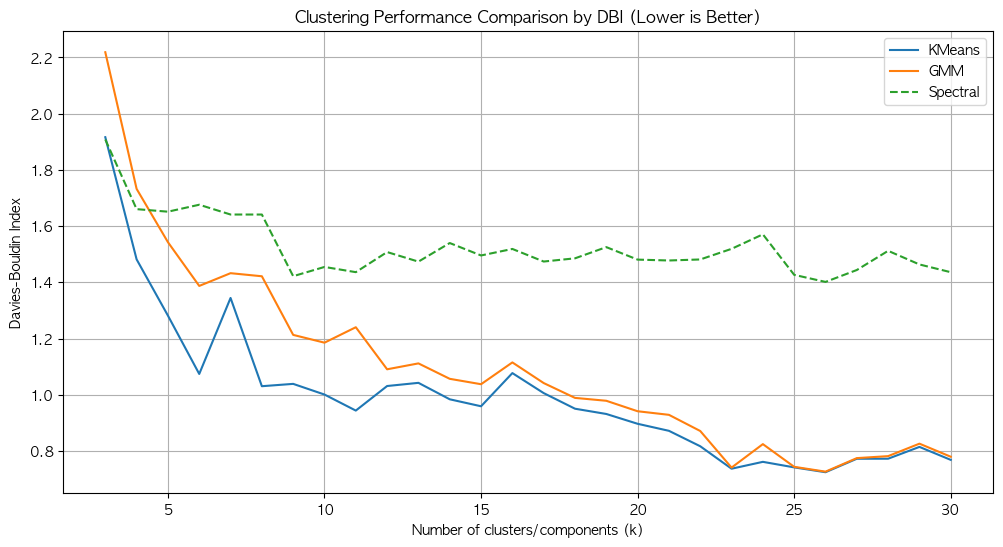

In [12]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2020_2022 = kmeans.fit_predict(X_scaled_2020_2022)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022))
    labels_kmeans_all[k] = kmeans_labels_2020_2022

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2020_2022 = gmm.fit_predict(X_scaled_df_2020_2022)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022))
    labels_gmm_all[k] = gmm_labels_2020_2022

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2020_2022 = spectral.fit_predict(X_scaled_df_2020_2022)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022))
        labels_spectral_all[k] = spectral_labels_2020_2022

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### SHAP 분석

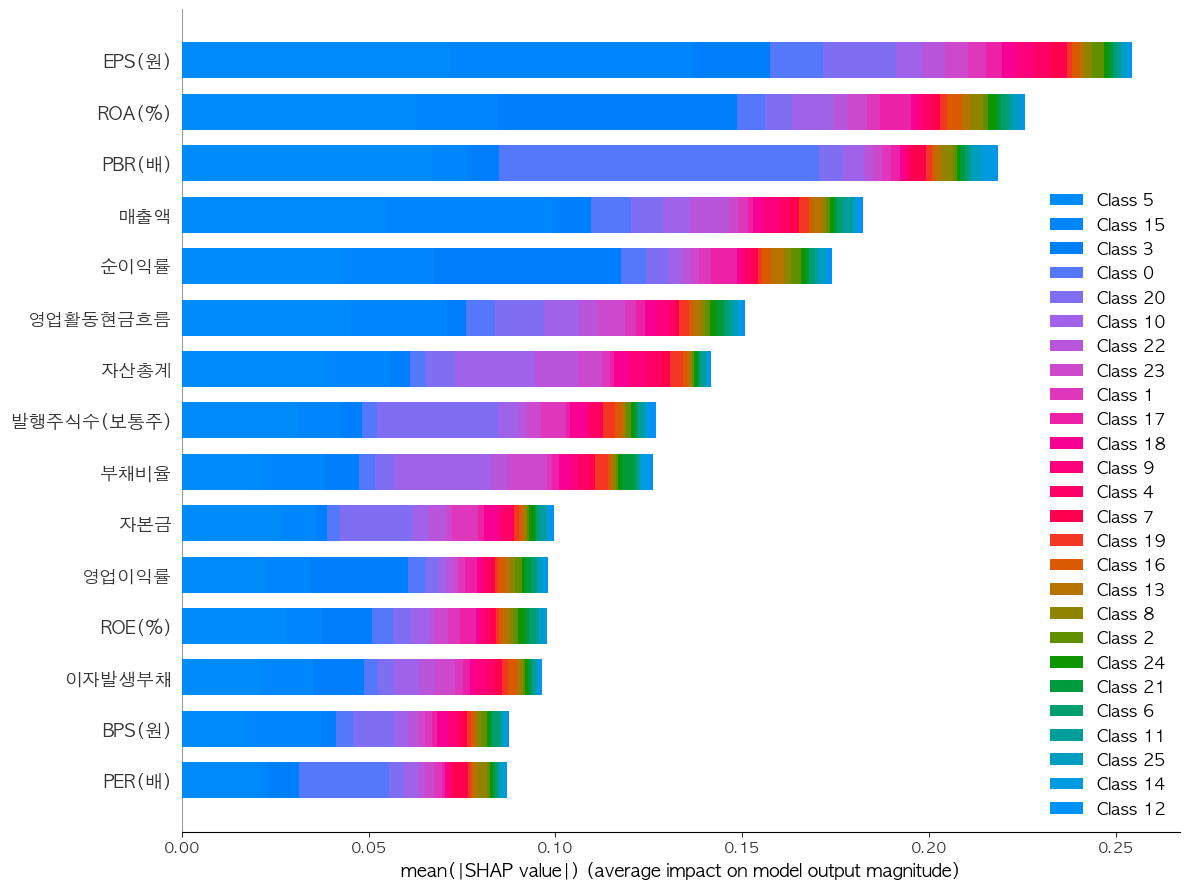

실제 사용된 클러스터 수: 26


In [13]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2020_2022 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2020_2022 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2020_2022 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2020_2022['Cluster'] = final_labels_2020_2022

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2020_2022, final_labels_2020_2022)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2020_2022 = explainer.shap_values(X_scaled_df_2020_2022)

# ✅ summary plot
shap.summary_plot(shap_values_2020_2022, X_scaled_df_2020_2022, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2020_2022)))


### 각 클러스터 별, 클러스터 형성에 큰 영향을 미쳤던 Feature

In [14]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2020_2022 = {}
unique_clusters_2020_2022 = np.unique(final_labels_2020_2022)

for cluster_id in unique_clusters_2020_2022:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2020_2022 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2020_2022[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2020_2022.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2020_2022[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2020_2022.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2020_2022:
    shap_arr = cluster_shap_means_2020_2022[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2020_2022.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2020_2022.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2020_2022:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24,Class 25
매출액,0.037998,0.005006,0.002017,0.006755,0.010786,0.006428,0.021280,0.005847,0.020048,0.010413,...,0.012036,0.005015,0.010767,0.009508,0.007946,0.001409,0.011764,0.008710,0.002790,0.016828
자산총계,0.019961,0.000250,0.000225,0.002032,0.006762,0.002046,0.002512,0.023855,0.000706,0.003175,...,0.002080,0.001726,0.005357,0.005511,0.002820,0.002691,0.002271,0.007232,0.000347,0.009890
자본금,0.013680,0.008617,0.002270,0.001952,0.003593,0.001733,0.000225,0.003534,0.002679,0.003140,...,0.002348,0.010666,0.004853,0.003265,0.005127,0.000875,0.002040,0.002762,0.001137,0.000833
영업활동현금흐름,0.031038,0.011333,0.004609,0.003009,0.008128,0.004148,0.006515,0.004669,0.003842,0.009427,...,0.007250,0.005427,0.007953,0.007772,0.010975,0.013287,0.006792,0.011027,0.013313,0.002025
이자발생부채,0.014447,0.003693,0.000876,0.002251,0.006360,0.001690,0.001592,0.009529,0.021452,0.003475,...,0.001620,0.003045,0.002596,0.005293,0.002560,0.002901,0.003933,0.003449,0.000190,0.008434
영업이익률,0.012976,0.001963,0.000673,0.004961,0.002406,0.003891,0.001648,0.001989,0.020355,0.002444,...,0.003741,0.009105,0.001169,0.001054,0.004100,0.008003,0.002452,0.003790,0.000505,0.022691
순이익률,0.017621,0.002513,0.000192,0.007993,0.002279,0.005442,0.003687,0.001832,0.037989,0.003258,...,0.008800,0.013602,0.002284,0.001387,0.007319,0.000352,0.002983,0.002321,0.003498,0.032067
ROE(%),0.021367,0.004993,0.002384,0.006725,0.000766,0.003139,0.007550,0.009309,0.033147,0.002171,...,0.006109,0.016030,0.000717,0.000308,0.004104,0.005887,0.002415,0.002058,0.004547,0.045978
ROA(%),0.028599,0.001605,0.005307,0.013234,0.002593,0.002807,0.003003,0.005842,0.106896,0.002805,...,0.012321,0.031915,0.000307,0.000727,0.003087,0.001259,0.002695,0.001641,0.003764,0.071009
부채비율,0.018540,0.000942,0.002656,0.002854,0.006501,0.001805,0.005027,0.006093,0.000927,0.001932,...,0.007140,0.005011,0.004176,0.003685,0.002685,0.004010,0.002310,0.005717,0.005565,0.009059



Class 0에 중요한 특성 순위:
1. PBR(배): 0.370296
2. PER(배): 0.102325
3. EPS(원): 0.051958
4. 매출액: 0.037998
5. 영업활동현금흐름: 0.031038
6. ROA(%): 0.028599
7. BPS(원): 0.022432
8. ROE(%): 0.021367
9. 자산총계: 0.019961
10. 부채비율: 0.018540
11. 순이익률: 0.017621
12. 발행주식수(보통주): 0.016409
13. 이자발생부채: 0.014447
14. 자본금: 0.013680
15. 영업이익률: 0.012976

Class 1에 중요한 특성 순위:
1. PBR(배): 0.049073
2. 발행주식수(보통주): 0.012083
3. 영업활동현금흐름: 0.011333
4. EPS(원): 0.011202
5. PER(배): 0.009666
6. 자본금: 0.008617
7. 매출액: 0.005006
8. ROE(%): 0.004993
9. 이자발생부채: 0.003693
10. BPS(원): 0.002606
11. 순이익률: 0.002513
12. 영업이익률: 0.001963
13. ROA(%): 0.001605
14. 부채비율: 0.000942
15. 자산총계: 0.000250

Class 2에 중요한 특성 순위:
1. PBR(배): 0.047153
2. EPS(원): 0.016840
3. PER(배): 0.012610
4. ROA(%): 0.005307
5. BPS(원): 0.004641
6. 영업활동현금흐름: 0.004609
7. 부채비율: 0.002656
8. ROE(%): 0.002384
9. 자본금: 0.002270
10. 매출액: 0.002017
11. 발행주식수(보통주): 0.001990
12. 이자발생부채: 0.000876
13. 영업이익률: 0.000673
14. 자산총계: 0.000225
15. 순이익률: 0.000192

Class 3에 중요한 특성 순위:
1. PBR(배): 0.044652

### 각 클러스터 별 편입 종목 확인

In [15]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2020_2022:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2020_2022[final_labels_2020_2022 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
LG에너지솔루션, SK아이이테크놀로지, 두산퓨얼셀, 삼성바이오로직스, 셀트리온, 씨에스윈드, 엘앤에프, 일진하이솔루스, 카카오페이, 코스모신소재, 포스코퓨처엠, 하이브, 한미사이언스, 한미약품, 한전기술, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
LG디스플레이, 두산에너빌리티, 삼성중공업
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
KT&G, LG, OCI홀딩스, PI첨단소재, SK케미칼, 금호석유화학, 덴티움, 동서, 롯데정밀화학, 미스토홀딩스, 미원상사, 삼성전기, 삼양식품, 엔씨소프트, 영원무역, 영원무역홀딩스, 오리온, 코웨이, 크래프톤, 한미반도체, 한솔케미칼
[클러스터 4에 속한 종목들]:
KB금융, 신한지주
[클러스터 5에 속한 종목들]:
BGF리테일, CJ대한통운, DL, DL이앤씨, GS건설, GS리테일, HD한국조선해양, HD현대미포, HD현대인프라코어, HD현대일렉트릭, HL만도, KCC, LIG넥스원, LS ELECTRIC, SKC, SK네트웍스, SK스퀘어, TCC스틸, TKG휴켐스, 강원랜드, 넷마블, 녹십자, 녹십자홀딩스, 농심, 대상, 대웅, 대웅제약, 대한유화, 대한전선, 더블유게임즈, 동원시스템즈, 두산, 두산밥캣, 롯데쇼핑, 롯데웰푸드, 롯데지주, 롯데칠성, 삼성카드, 삼아알미늄, 세방전지, 세아베스틸지주, 아모레퍼시픽, 아모레퍼시픽홀딩스, 에스엘, 에스원, 오리온홀딩스, 유한양행, 율촌화학, 제일기획, 종근당, 코스맥스, 코스모화학, 코오롱인더, 포스코DX, 풍산, 하이트진로, 한국앤컴퍼니, 한국콜마, 한국타이어앤테크놀로지, 한국항공우주, 한샘, 한세실업, 한일시멘트, 한전KPS, 한화솔루션, 한화시스템, 한화에어로스페이스, 현대건설, 현대로템, 현대백화점, 현대엘리베이터, 현대위아, 효성중공업
[클러스터 6에 속한 종목들]:
GKL
[클러스터 7에 속한 종목들]:
HS효성첨단소재, 한올바이오파마
[클러스터 8에 속한 종목들]:
SK바이오팜
[클러스터 9에 

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

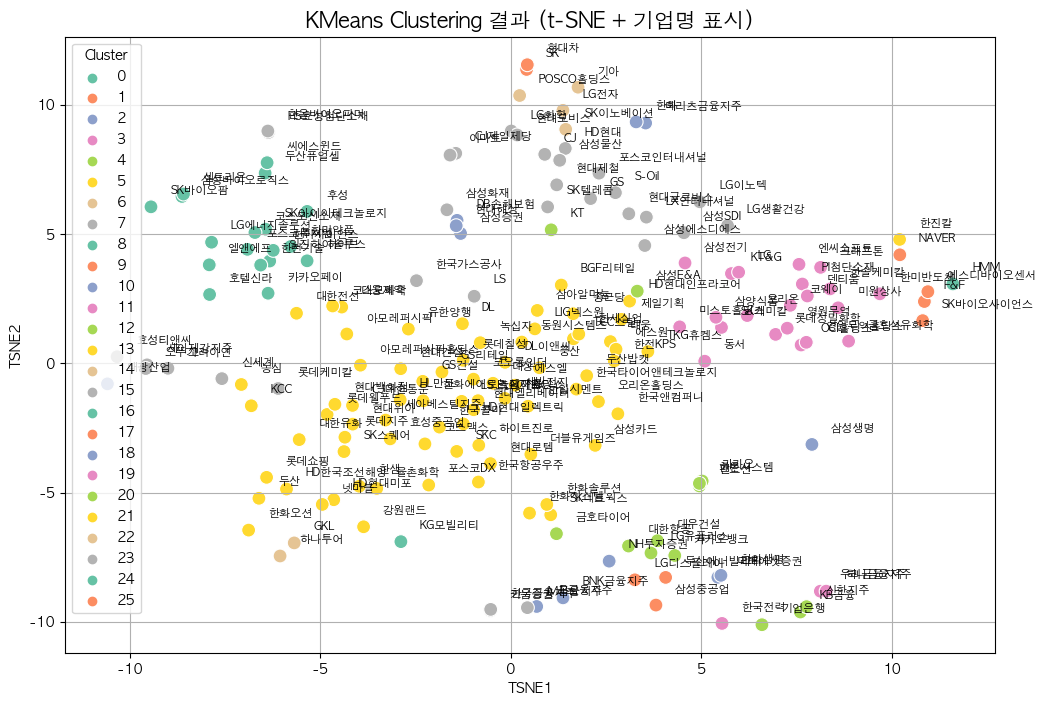

In [16]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2020_2022)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2020_2022.values,
    'Cluster': final_labels_2020_2022,  # ✅ 자동 선택된 클러스터 라벨 사용
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title(f"{best_method} Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2021-2023)

Best K for KMeans (lowest DBI): 30 -> DBI = 0.8024
Best K for GMM (lowest DBI): 30 -> DBI = 0.8020
Best K for Spectral Clustering (lowest DBI): 24 -> DBI = 1.3787


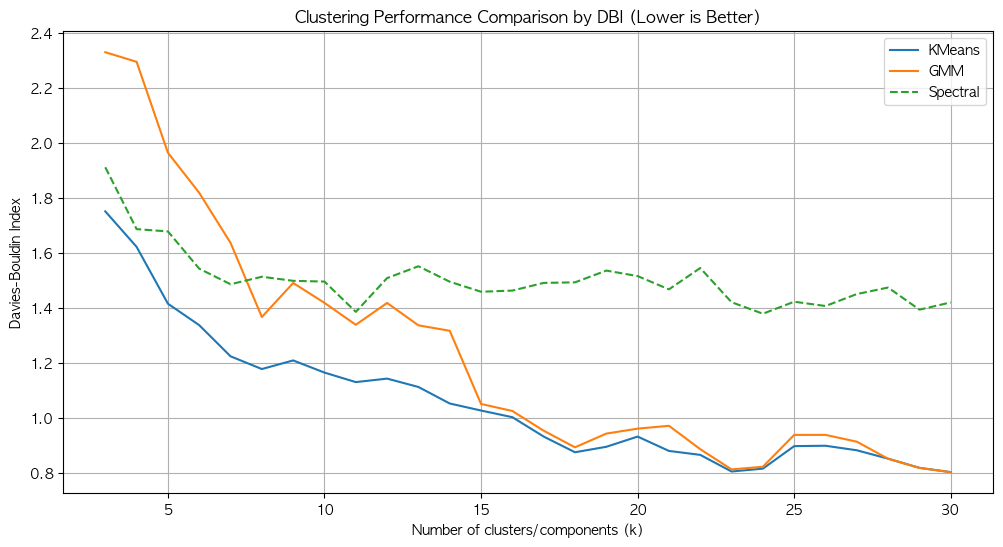

In [17]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2021_2023 = kmeans.fit_predict(X_scaled_2021_2023)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023))
    labels_kmeans_all[k] = kmeans_labels_2021_2023

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2021_2023 = gmm.fit_predict(X_scaled_df_2021_2023)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023))
    labels_gmm_all[k] = gmm_labels_2021_2023

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2021_2023 = spectral.fit_predict(X_scaled_df_2021_2023)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023))
        labels_spectral_all[k] = spectral_labels_2021_2023

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### SHAP 분석

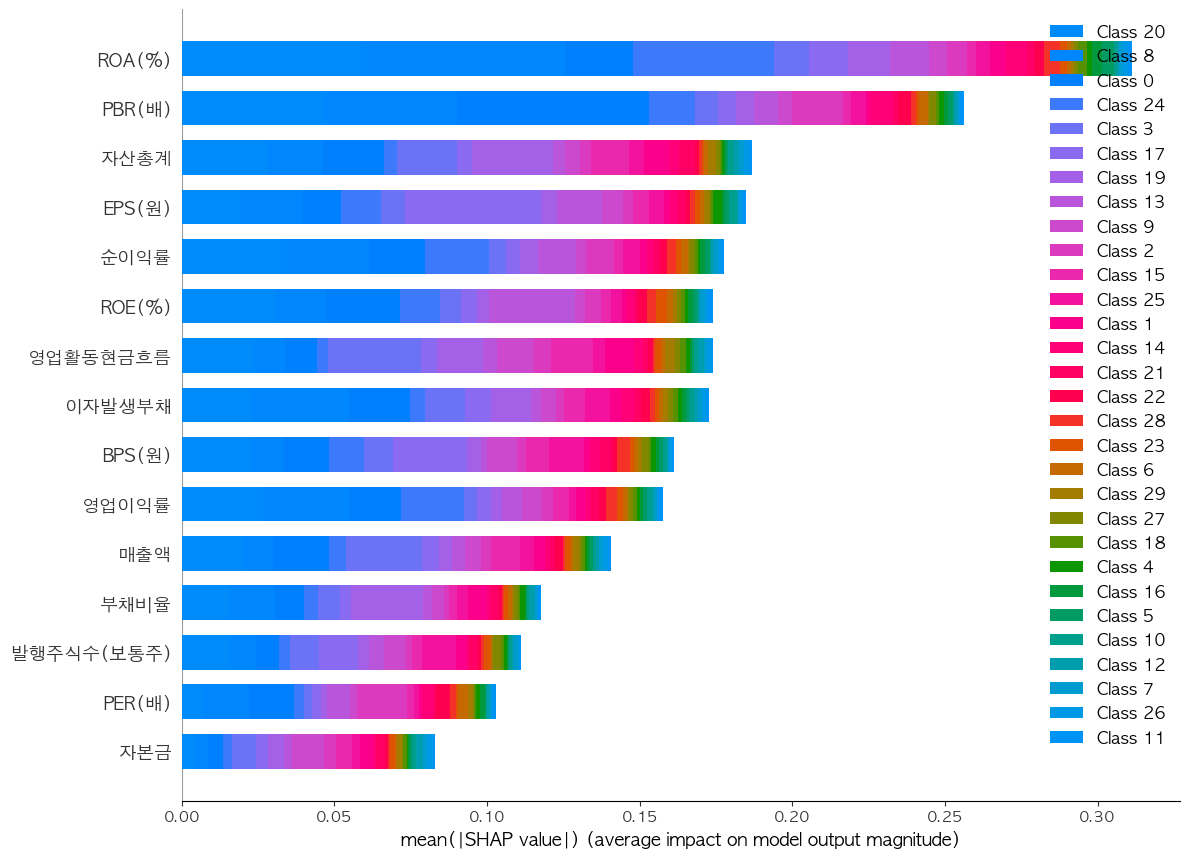

실제 사용된 클러스터 수: 30


In [18]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2021_2023 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2021_2023 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2021_2023 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2021_2023['Cluster'] = final_labels_2021_2023

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2021_2023, final_labels_2021_2023)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2021_2023 = explainer.shap_values(X_scaled_df_2021_2023)

# ✅ summary plot
shap.summary_plot(shap_values_2021_2023, X_scaled_df_2021_2023, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2021_2023)))


### 각 클러스터 별, 클러스터 형성에 큰 영향을 미쳤던 Feature

In [19]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2021_2023 = {}
unique_clusters_2021_2023 = np.unique(final_labels_2021_2023)

for cluster_id in unique_clusters_2021_2023:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2021_2023 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2021_2023[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2021_2023.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2021_2023[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2021_2023.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2021_2023:
    shap_arr = cluster_shap_means_2021_2023[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2021_2023.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2021_2023.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2021_2023:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 20,Class 21,Class 22,Class 23,Class 24,Class 25,Class 26,Class 27,Class 28,Class 29
매출액,0.041171,0.020613,0.012602,0.025828,0.016467,0.006685,0.012035,0.017332,0.014408,0.016754,...,0.014908,0.017425,0.012255,0.005977,0.010902,0.009950,0.019472,0.009096,0.011868,0.019576
자산총계,0.045758,0.029664,0.015988,0.026273,0.000652,0.011847,0.020389,0.021468,0.012229,0.022298,...,0.009845,0.031582,0.010424,0.013807,0.011710,0.009291,0.022364,0.009694,0.014848,0.022892
자본금,0.012152,0.001491,0.011106,0.002478,0.001685,0.006766,0.004883,0.001779,0.004143,0.005677,...,0.003350,0.004093,0.005242,0.000773,0.002747,0.002155,0.001814,0.003388,0.003737,0.001950
영업활동현금흐름,0.030640,0.011966,0.005427,0.017599,0.006490,0.003722,0.011266,0.004886,0.004351,0.018178,...,0.004151,0.010905,0.009321,0.010391,0.005015,0.005140,0.018044,0.015354,0.000483,0.011981
이자발생부채,0.045795,0.020493,0.013071,0.022632,0.016502,0.004729,0.012364,0.019629,0.011911,0.022790,...,0.016835,0.032881,0.010195,0.014192,0.010815,0.019483,0.016494,0.024868,0.007180,0.019744
영업이익률,0.042396,0.006612,0.007736,0.008356,0.010174,0.057366,0.011727,0.003928,0.017087,0.012048,...,0.010114,0.008413,0.016185,0.004117,0.035199,0.007863,0.002357,0.007727,0.055346,0.006228
순이익률,0.048918,0.007763,0.035410,0.009397,0.011627,0.036358,0.047125,0.009180,0.011891,0.012226,...,0.010721,0.003685,0.038734,0.019337,0.018097,0.016250,0.010736,0.001520,0.027998,0.003065
ROE(%),0.057259,0.004776,0.043615,0.011965,0.014884,0.011648,0.067499,0.023685,0.009437,0.014062,...,0.017893,0.006146,0.056641,0.048851,0.014822,0.030005,0.015678,0.027075,0.020220,0.011380
ROA(%),0.055357,0.003414,0.008003,0.009731,0.009929,0.105581,0.011668,0.004823,0.015346,0.010436,...,0.008350,0.001850,0.010779,0.017528,0.066017,0.009583,0.010809,0.004704,0.084973,0.002721
부채비율,0.023219,0.003323,0.007036,0.005053,0.010366,0.012118,0.015815,0.006130,0.010491,0.004880,...,0.007126,0.003111,0.011939,0.004594,0.008389,0.007971,0.000436,0.006967,0.008540,0.005185



Class 0에 중요한 특성 순위:
1. PBR(배): 0.140936
2. ROE(%): 0.057259
3. ROA(%): 0.055357
4. PER(배): 0.049459
5. 순이익률: 0.048918
6. 이자발생부채: 0.045795
7. 자산총계: 0.045758
8. 영업이익률: 0.042396
9. 매출액: 0.041171
10. EPS(원): 0.036713
11. BPS(원): 0.035772
12. 영업활동현금흐름: 0.030640
13. 부채비율: 0.023219
14. 발행주식수(보통주): 0.019824
15. 자본금: 0.012152

Class 1에 중요한 특성 순위:
1. PBR(배): 0.036411
2. 자산총계: 0.029664
3. 매출액: 0.020613
4. 이자발생부채: 0.020493
5. 영업활동현금흐름: 0.011966
6. 발행주식수(보통주): 0.008586
7. 순이익률: 0.007763
8. 영업이익률: 0.006612
9. ROE(%): 0.004776
10. PER(배): 0.003870
11. ROA(%): 0.003414
12. 부채비율: 0.003323
13. BPS(원): 0.003086
14. EPS(원): 0.002338
15. 자본금: 0.001491

Class 2에 중요한 특성 순위:
1. PBR(배): 0.059355
2. PER(배): 0.047967
3. ROE(%): 0.043615
4. 순이익률: 0.035410
5. 자산총계: 0.015988
6. 이자발생부채: 0.013071
7. 매출액: 0.012602
8. BPS(원): 0.012170
9. 자본금: 0.011106
10. EPS(원): 0.008729
11. ROA(%): 0.008003
12. 영업이익률: 0.007736
13. 부채비율: 0.007036
14. 영업활동현금흐름: 0.005427
15. 발행주식수(보통주): 0.004326

Class 3에 중요한 특성 순위:
1. PBR(배): 0.047895

### 각 클러스터 별 편입 종목 확인

In [20]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2021_2023:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2021_2023[final_labels_2021_2023 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
BGF리테일, HD현대일렉트릭, KG모빌리티, LIG넥스원, PI첨단소재, SK바이오사이언스, SK아이이테크놀로지, TCC스틸, 대웅제약, 대한전선, 동원시스템즈, 유한양행, 코스맥스, 하이브, 한국항공우주, 한미사이언스, 한미약품, 한전기술, 한화에어로스페이스, 현대로템, 현대엘리베이터, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
KB금융, 신한지주, 우리금융지주, 하나금융지주
[클러스터 2에 속한 종목들]:
HD현대중공업, 두산퓨얼셀, 삼아알미늄, 씨에스윈드, 일진하이솔루스, 포스코퓨처엠
[클러스터 3에 속한 종목들]:
CJ, DB손해보험, GS, HD현대, KT, LG에너지솔루션, S-Oil, SK텔레콤, 삼성물산, 포스코인터내셔널, 현대글로비스, 현대제철, 현대해상
[클러스터 4에 속한 종목들]:
태광산업
[클러스터 5에 속한 종목들]:
한미반도체
[클러스터 6에 속한 종목들]:
에코프로머티
[클러스터 7에 속한 종목들]:
한국전력
[클러스터 8에 속한 종목들]:
HD현대인프라코어, KT&G, LG, LX인터내셔널, SK케미칼, TKG휴켐스, 강원랜드, 대웅, 더블유게임즈, 동서, 두산밥캣, 롯데정밀화학, 미스토홀딩스, 삼성E&A, 삼성에스디에스, 삼성전기, 삼성카드, 세방전지, 에스엘, 에스원, 엔씨소프트, 오리온홀딩스, 제일기획, 풍산, 한국앤컴퍼니, 한국타이어앤테크놀로지, 한세실업, 한일시멘트, 한전KPS
[클러스터 9에 속한 종목들]:
LG유플러스, NH투자증권, 대우건설, 대한항공, 두산에너빌리티, 카카오뱅크
[클러스터 10에 속한 종목들]:
현대차
[클러스터 11에 속한 종목들]:
하나투어
[클러스터 12에 속한 종목들]:
기업은행
[클러스터 13에 속한 종목들]:
GKL, HD현대미포, SKC, 넷마블, 대한유화, 두산, 엘앤에프, 율촌화학, 코스모화학, 한샘
[클러스터 14에 속한 종목들]:
SK바이오팜, 코스모신소재, 포스코DX
[클러스터 15에 속한 종목들]:
LG전자, LG화학, POSCO홀딩스,

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

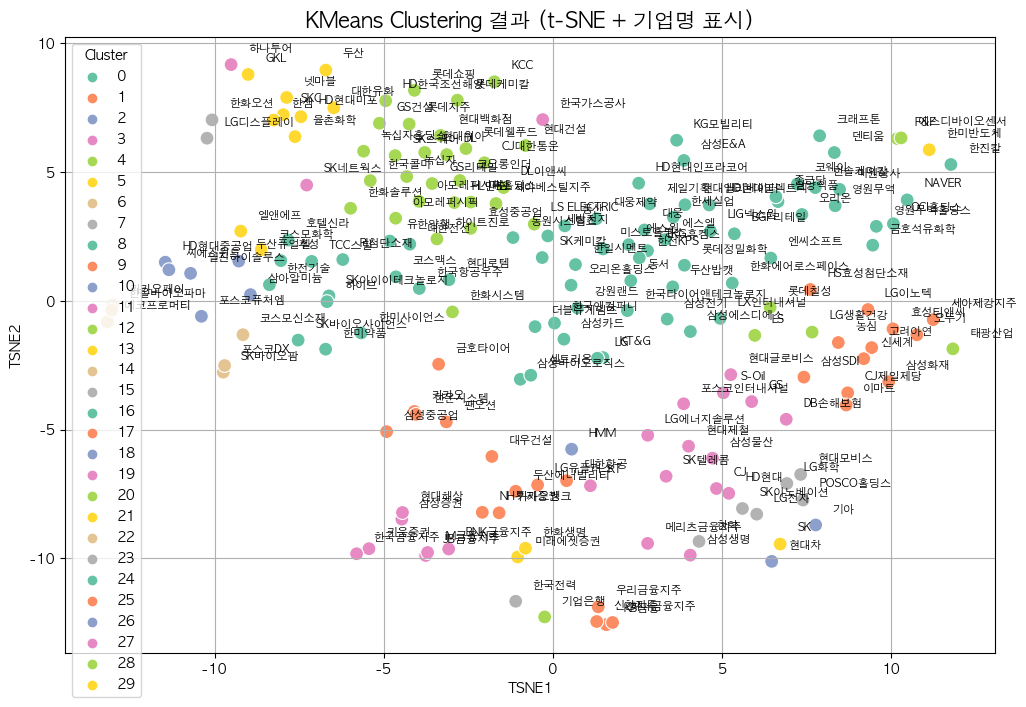

In [21]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2021_2023)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2021_2023.values,
    'Cluster': final_labels_2021_2023,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2022-2024) - 자동화

Best K for KMeans (lowest DBI): 14 -> DBI = 0.8381
Best K for GMM (lowest DBI): 19 -> DBI = 0.9126
Best K for Spectral Clustering (lowest DBI): 12 -> DBI = 1.3708


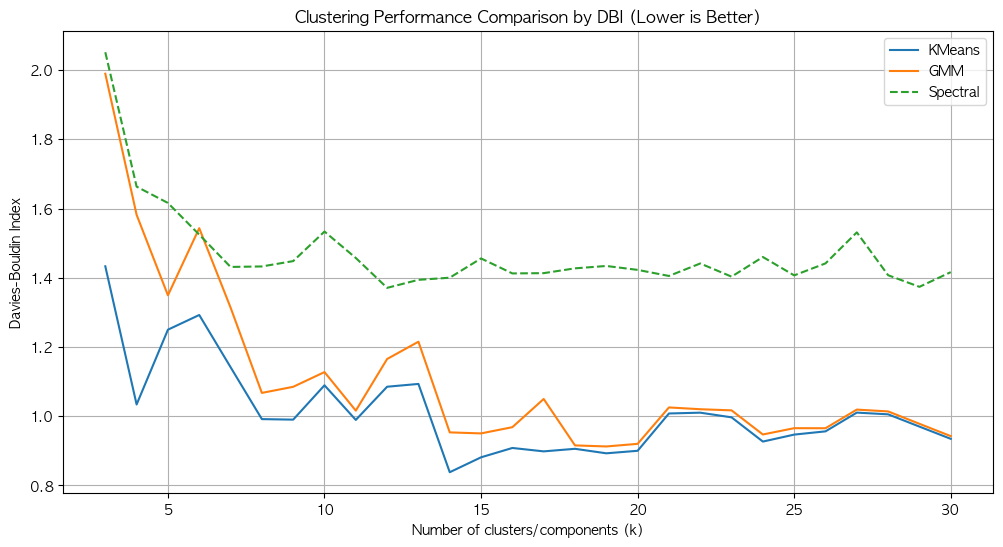

In [22]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2022_2024 = kmeans.fit_predict(X_scaled_2022_2024)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024))
    labels_kmeans_all[k] = kmeans_labels_2022_2024

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2022_2024 = gmm.fit_predict(X_scaled_df_2022_2024)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024))
    labels_gmm_all[k] = gmm_labels_2022_2024

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2022_2024 = spectral.fit_predict(X_scaled_df_2022_2024)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024))
        labels_spectral_all[k] = spectral_labels_2022_2024

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### SHAP 분석

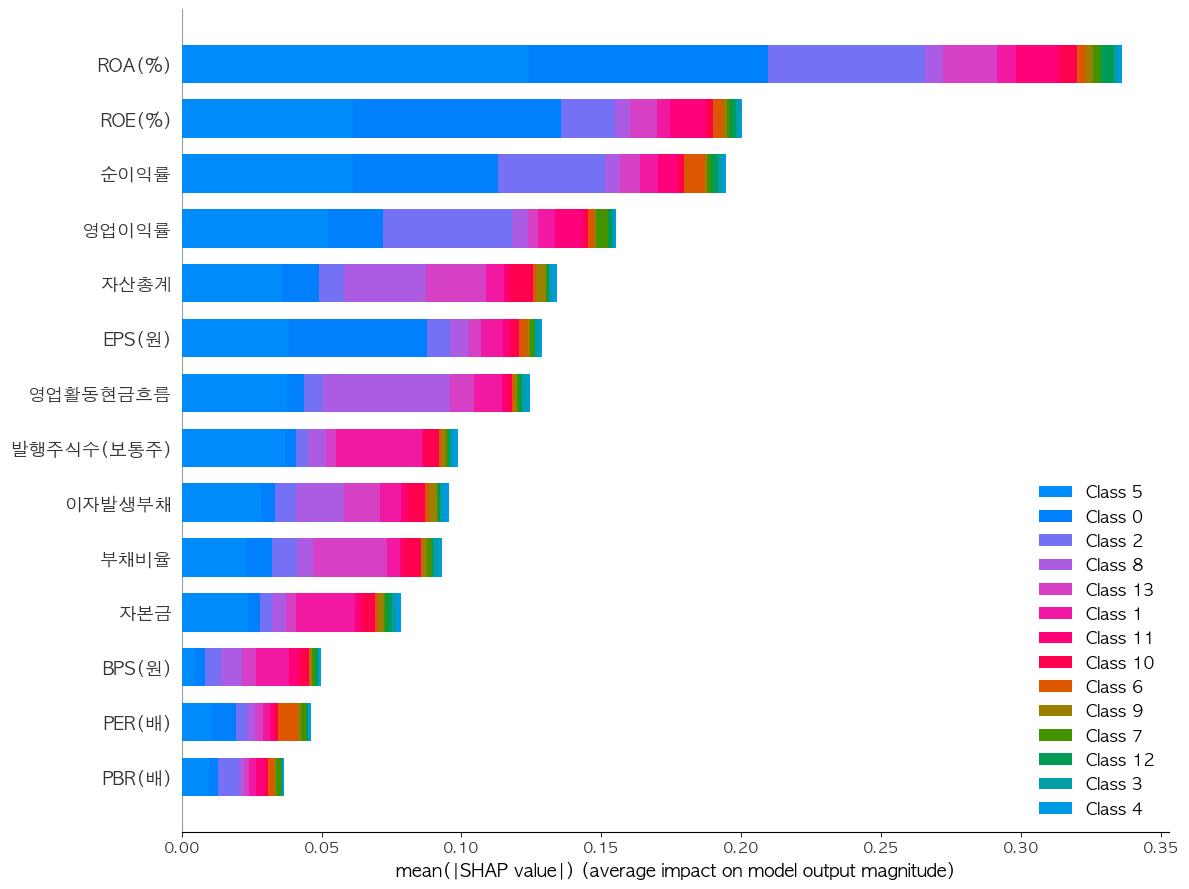

실제 사용된 클러스터 수: 14


In [23]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2022_2024 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2022_2024 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2022_2024 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2022_2024['Cluster'] = final_labels_2022_2024

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2022_2024, final_labels_2022_2024)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2022_2024 = explainer.shap_values(X_scaled_df_2022_2024)

# ✅ summary plot
shap.summary_plot(shap_values_2022_2024, X_scaled_df_2022_2024, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2022_2024)))


### 각 클러스터 별, 클러스터 형성에 큰 영향을 미쳤던 Feature

In [24]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2022_2024 = {}
unique_clusters_2022_2024 = np.unique(final_labels_2022_2024)

for cluster_id in unique_clusters_2022_2024:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2022_2024 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2022_2024[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2022_2024.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2022_2024[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2022_2024.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2022_2024:
    shap_arr = cluster_shap_means_2022_2024[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2022_2024.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2022_2024.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2022_2024:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13
자산총계,0.021645,0.012145,0.004284,0.084327,0.051189,0.004787,0.005543,0.005653,0.031207,0.020131,0.051872,0.004122,0.004174,0.038438
자본금,0.011450,0.012547,0.000634,0.054308,0.015447,0.000990,0.005675,0.004423,0.002098,0.002928,0.009361,0.000571,0.000695,0.003767
영업활동현금흐름,0.012119,0.007700,0.001575,0.053947,0.001647,0.002050,0.003881,0.002389,0.025290,0.004322,0.007656,0.001483,0.001574,0.002095
이자발생부채,0.011505,0.002241,0.001260,0.065303,0.021874,0.001164,0.014038,0.001963,0.011135,0.012667,0.021805,0.001563,0.001427,0.005669
영업이익률,0.044751,0.015497,0.015365,0.032108,0.011843,0.012284,0.019195,0.044612,0.014981,0.011511,0.015412,0.015942,0.015355,0.015946
순이익률,0.121075,0.041383,0.036143,0.091533,0.029201,0.034730,0.054568,0.039277,0.034957,0.031952,0.030638,0.035238,0.036366,0.037433
ROE(%),0.183970,0.061429,0.046231,0.098987,0.038272,0.048282,0.077317,0.046414,0.051707,0.035359,0.037456,0.045380,0.045797,0.048455
ROA(%),0.189778,0.061354,0.062620,0.103136,0.055211,0.062215,0.106447,0.072554,0.059281,0.044081,0.051195,0.060279,0.061487,0.047660
부채비율,0.016718,0.017978,0.002552,0.070065,0.036464,0.003028,0.005609,0.010122,0.008750,0.000490,0.034834,0.002323,0.001594,0.035843
EPS(원),0.118984,0.038120,0.033620,0.084423,0.017637,0.033255,0.068138,0.054428,0.034380,0.027346,0.022874,0.032399,0.034986,0.024536



Class 0에 중요한 특성 순위:
1. ROA(%): 0.189778
2. ROE(%): 0.183970
3. 순이익률: 0.121075
4. EPS(원): 0.118984
5. 영업이익률: 0.044751
6. PER(배): 0.024221
7. 자산총계: 0.021645
8. 부채비율: 0.016718
9. 영업활동현금흐름: 0.012119
10. 이자발생부채: 0.011505
11. 자본금: 0.011450
12. 발행주식수(보통주): 0.009147
13. BPS(원): 0.007754
14. PBR(배): 0.006927

Class 1에 중요한 특성 순위:
1. ROE(%): 0.061429
2. ROA(%): 0.061354
3. 순이익률: 0.041383
4. EPS(원): 0.038120
5. 발행주식수(보통주): 0.024455
6. 부채비율: 0.017978
7. 영업이익률: 0.015497
8. 자본금: 0.012547
9. 자산총계: 0.012145
10. BPS(원): 0.009030
11. 영업활동현금흐름: 0.007700
12. PER(배): 0.004149
13. PBR(배): 0.003732
14. 이자발생부채: 0.002241

Class 2에 중요한 특성 순위:
1. ROA(%): 0.062620
2. ROE(%): 0.046231
3. 순이익률: 0.036143
4. EPS(원): 0.033620
5. 영업이익률: 0.015365
6. 자산총계: 0.004284
7. 부채비율: 0.002552
8. PER(배): 0.001928
9. 영업활동현금흐름: 0.001575
10. BPS(원): 0.001450
11. 이자발생부채: 0.001260
12. 발행주식수(보통주): 0.000784
13. PBR(배): 0.000760
14. 자본금: 0.000634

Class 3에 중요한 특성 순위:
1. ROA(%): 0.103136
2. ROE(%): 0.098987
3. 순이익률: 0.091533
4. EPS(원): 0.08

### 각 클러스터 별 편입 종목 확인

In [25]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2022_2024:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2022_2024[final_labels_2022_2024 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
DL, GS건설, GS리테일, HD현대미포, KG모빌리티, LG디스플레이, SKC, SK네트웍스, SK바이오사이언스, SK이노베이션, 넷마블, 녹십자, 녹십자홀딩스, 대한유화, 두산, 두산퓨얼셀, 롯데쇼핑, 롯데지주, 롯데케미칼, 삼아알미늄, 엘앤에프, 율촌화학, 이마트, 일진하이솔루스, 카카오, 코스모화학, 포스코퓨처엠, 한온시스템, 한올바이오파마, 한화솔루션, 한화오션, 현대건설, 현대백화점, 현대제철, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
HMM, LG유플러스, 금호타이어, 대우건설, 대한항공, 두산에너빌리티, 삼성중공업, 카카오뱅크, 팬오션, 한화생명
[클러스터 2에 속한 종목들]:
HD현대일렉트릭, KT&G, SK스퀘어, 강원랜드, 더블유게임즈, 덴티움, 동서, 미원상사, 삼성바이오로직스, 삼양식품, 셀트리온, 영원무역, 영원무역홀딩스, 오리온, 종근당, 코웨이, 크래프톤, 포스코DX, 한국앤컴퍼니, 한미약품, 한솔케미칼, 한전KPS, 한화에어로스페이스
[클러스터 3에 속한 종목들]:
한국전력
[클러스터 4에 속한 종목들]:
기업은행
[클러스터 5에 속한 종목들]:
BGF리테일, CJ대한통운, CJ제일제당, DL이앤씨, GKL, GS, HD한국조선해양, HD현대인프라코어, HD현대중공업, HL만도, HS효성첨단소재, KCC, LG, LG생활건강, LG에너지솔루션, LG이노텍, LIG넥스원, LS, LS ELECTRIC, LX인터내셔널, NAVER, OCI홀딩스, PI첨단소재, S-Oil, SK아이이테크놀로지, SK케미칼, TCC스틸, TKG휴켐스, 고려아연, 금호석유화학, 농심, 대상, 대웅, 대웅제약, 대한전선, 동원시스템즈, 두산밥캣, 롯데웰푸드, 롯데정밀화학, 롯데칠성, 미스토홀딩스, 삼성E&A, 삼성SDI, 삼성물산, 삼성에스디에스, 삼성전기, 삼성카드, 삼성화재, 세방전지, 세아베스틸지주, 세아제강지주, 신세계, 씨에스윈드, 아모레퍼시픽, 아모레퍼시픽홀딩스, 에스엘, 에스원, 엔씨소프트, 오뚜기, 오

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

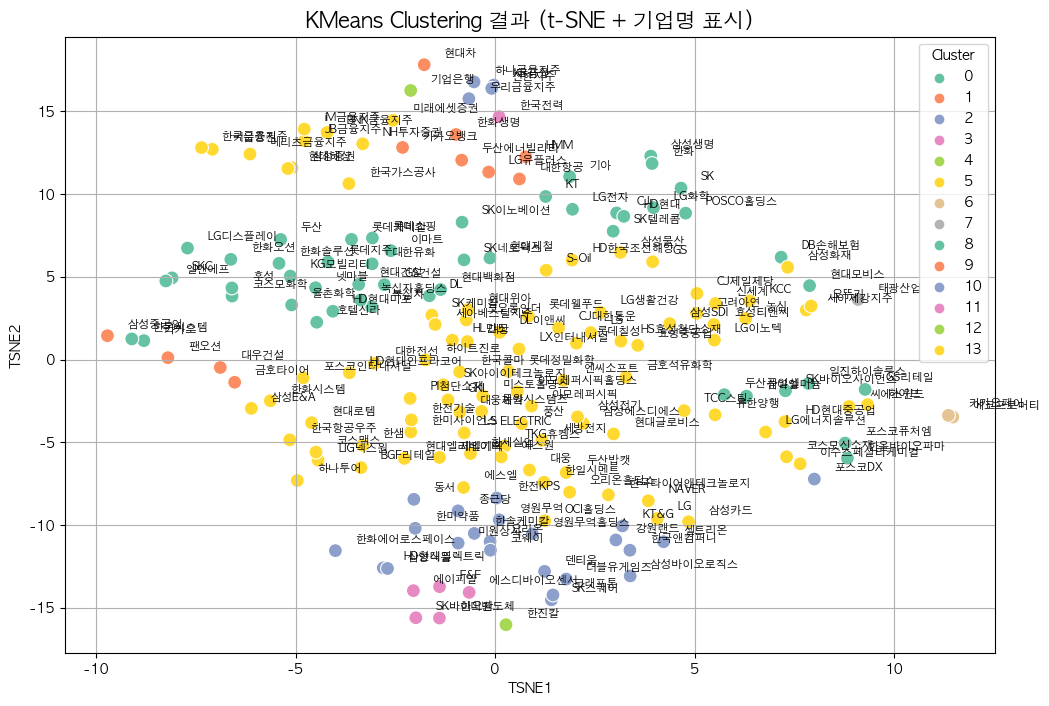

In [26]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2022_2024)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2022_2024.values,
    'Cluster': final_labels_2022_2024,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# 포트폴리오 최적화

## Inter Cluster Portfolio vs. Random Sampling Portfolio

## Evaluation Using Sortino Ratio, CVaR, MDD and Omega Ratio

### 자산 데이터 수집 및 로그 수익률 변환

In [27]:
#자산들 목록 보기
import FinanceDataReader as fdr
from tqdm import tqdm
import datetime

# 1. 세 윈도우에서 기업명 합집합 만들기
companies_2020_2022 = set(df_2020_2022['기업명_그룹'])
companies_2021_2023 = set(df_2021_2023['기업명_그룹'])
companies_2022_2024 = set(df_2022_2024['기업명_그룹'])

all_companies = companies_2020_2022.union(companies_2021_2023).union(companies_2022_2024)
company_list = sorted(all_companies)

krx_listed = fdr.StockListing('KRX')

# 기업명과 티커 매핑
company_ticker_map = {}
for name in company_list:
    match = krx_listed[krx_listed['Name'] == name]
    if not match.empty:
        code = match.iloc[0]['Code']
        company_ticker_map[name] = code
    else:
        print(f"매칭되지 않은 기업명: {name}")

# 매핑 결과 확인
print("매핑된 기업 수:", len(company_ticker_map))


매핑된 기업 수: 195


In [28]:
start_date = '2020-01-01'
end_date = '2024-12-31'

# 종가 데이터를 담을 딕셔너리
close_price_dict = {}
failed_companies = []

# tqdm으로 진행 상황 출력
for name, ticker in tqdm(company_ticker_map.items(), desc="📈 종가 수집 중"):
    try:
        df = fdr.DataReader(ticker, start=start_date, end=end_date)
        if 'Close' in df.columns and not df['Close'].isna().all():
            close_price_dict[name] = df['Close']
        else:
            failed_companies.append(name)
    except Exception as e:
        failed_companies.append(name)
        print(f"{name} 데이터 수집 실패: {e}")

# 딕셔너리를 하나의 데이터프레임으로 결합
price_df = pd.DataFrame(close_price_dict)

📈 종가 수집 중: 100%|██████████| 195/195 [00:39<00:00,  4.98it/s]


In [29]:
price_df

,BGF리테일,BNK금융지주,CJ,CJ대한통운,CJ제일제당,DB손해보험,DL,DL이앤씨,F&F,GKL,...,현대백화점,현대엘리베이터,현대위아,현대제철,현대차,현대해상,호텔신라,효성중공업,효성티앤씨,후성
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,168500,7470,93800,152500,245000,50100,79337,NaN,NaN,19450,...,85900,45083,48950,31200,118000,25900,94000,26900,152500,7940
2020-01-03,169000,7490,92600,148000,241000,50800,79337,NaN,NaN,19600,...,85600,45083,47800,30800,116000,25450,95300,27200,152000,8018
2020-01-06,166500,7350,90300,147000,233500,50200,75994,NaN,NaN,19050,...,84000,43416,46750,29650,116000,25350,94900,26100,149500,7783
2020-01-07,169500,7430,91100,147000,234000,49750,76988,NaN,NaN,20000,...,88900,43682,46250,29500,115500,25600,99400,26200,150500,7891
2020-01-08,169500,7330,90900,143500,229500,48550,74639,NaN,NaN,19700,...,87300,41348,44750,28200,112000,25050,97300,24550,145000,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,107700,10630,107900,82500,265000,104700,33800,33100.0,54900.0,11350,...,48800,59100,39350,21750,215000,25250,38250,424500,239500,5110
2024-12-24,107000,10730,102200,82200,264500,105600,33800,32950.0,53700.0,11350,...,49100,59500,39250,21700,216500,25600,38250,393000,245500,5000
2024-12-26,105400,10590,102100,81200,261000,105300,33550,32400.0,54000.0,11340,...,48150,58600,39000,21350,217500,25450,37550,389500,241500,4945


In [30]:
# 3. 연도 필터링 함수
price_2020_2022 = price_df.loc["2020-01-01":"2022-12-31"]
price_2021_2023 = price_df.loc["2021-01-01":"2023-12-31"]
price_2022_2024 = price_df.loc["2022-01-01":"2024-12-31"]

# 5. 저장
# price_df.to_csv("../csv/log_returns_total.csv")

price_2020_2022 = price_2020_2022.astype(float)
price_2021_2023 = price_2021_2023.astype(float)
price_2022_2024 = price_2022_2024.astype(float)

log_ret_2020_2022 = np.log(price_2020_2022 / price_2020_2022.shift(1))
log_ret_2020_2022 = log_ret_2020_2022.bfill()

log_ret_2021_2023 = np.log(price_2021_2023 / price_2021_2023.shift(1))
log_ret_2021_2023 = log_ret_2021_2023.bfill()

log_ret_2022_2024 = np.log(price_2022_2024 / price_2022_2024.shift(1))
log_ret_2022_2024 = log_ret_2022_2024.bfill()



#### Markowitz Min-Variance Model

In [31]:
# 1. 최소 분산 모델
def markowitz_min_variance(returns: pd.DataFrame, target_return):
    mean_returns = returns.mean().values
    cov_matrix = returns.cov().values
    num_assets = len(mean_returns)

    # 포트폴리오 분산 (리스크) 계산
    def portfolio_variance(weights):
        return weights.T @ cov_matrix @ weights

    # 제약조건: 총합 = 1, 기대 수익률 ≥ target_return
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'ineq', 'fun': lambda w: w @ mean_returns - target_return}
    ]

    # 비중 범위 (0~1)

    min_weights = 0.001
    bounds = tuple((min_weights, 1) for _ in range(num_assets))
    init_guess = np.repeat(1 / num_assets, num_assets)

    result = minimize(portfolio_variance, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        return result.x
    else:
        raise ValueError("최적화 실패: ", result.message)
        

#### Evaluation Functions

In [32]:
from scipy.stats import ttest_ind
from scipy.optimize import minimize

def sortino_ratio(returns, risk_free_rate=0.0):
    downside_returns = returns[returns < risk_free_rate]
    denom = np.std(downside_returns)
    if denom == 0 or np.isnan(denom):
        return np.nan
    return np.mean(returns - risk_free_rate) / denom

def cvar(returns, alpha=0.01):
    if len(returns) == 0:
        return np.nan
    var_threshold = np.quantile(returns, alpha)
    tail_losses = returns[returns <= var_threshold]
    return tail_losses.mean() if len(tail_losses) > 0 else np.nan


def max_drawdown(returns: pd.Series) -> float:
    returns = returns.dropna()
    if len(returns) == 0:
        return np.nan
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()


def omega_ratio(returns: pd.Series, target_return: float = 0.0) -> float:
    returns = returns.dropna()
    if len(returns) == 0:
        return np.nan
    excess_returns = returns - target_return
    gain = excess_returns[excess_returns > 0].sum()
    loss = -excess_returns[excess_returns < 0].sum()
    return gain / loss if loss != 0 else np.nan


### Portfolio for 2020 ~ 2022

In [33]:
log_ret_2020_2022.index = pd.to_datetime(log_ret_2020_2022.index)

start_date = log_ret_2020_2022.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2020_2022.index.max()

returns_in_sample_2020_2022 = log_ret_2020_2022.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2020_2022 = log_ret_2020_2022.loc[cutoff_date : end_date]

returns_in_sample_2020_2022.shape, returns_out_sample_2020_2022.shape, cutoff_date

((496, 195), (246, 195), Timestamp('2022-01-02 00:00:00'))

#### 클러스터 수만큼 Random Sampling

In [34]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2020_2022 = company_2020_2022.tolist()

# 총 클러스터 수
num_clusters_2020_2022 = len(unique_clusters_2020_2022)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios_2020_2022 = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2020_2022, num_clusters_2020_2022)
    random_portfolios_2020_2022.append(sampled_assets)


#### Inter-Cluster Portfolio 구성

In [35]:
# 기업명 리스트를 클러스터링에 사용한 X_raw 기준으로 재정렬
company_2020_2022 = df_2020_2022.loc[X_raw_2020_2022.index, '기업명_그룹'].reset_index(drop=True)
final_labels_2020_2022 = final_labels_2020_2022[:len(company_2020_2022)]

# 클러스터 ID → 종목 리스트 매핑
cluster_to_stocks_2020_2022 = {
    cluster_id: company_2020_2022[final_labels_2020_2022 == cluster_id].tolist()
    for cluster_id in unique_clusters_2020_2022
}

# 클러스터 기반 Inter 방식 포트폴리오 1000개 생성
inter_cluster_portfolios_2020_2022 = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks_2020_2022.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios_2020_2022.append(sampled)


In [36]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios_2020_2022, expected_len=num_clusters_2020_2022)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios_2020_2022, expected_len=num_clusters_2020_2022)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
26개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
26개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [37]:

def optimize_and_evaluate_with_weights(portfolio_list, returns_in, returns_out, optimizer_func):
    sortino_scores, cvar_scores, mdd_scores, omega_scores, weight_records = [], [], [], [], []

    for portfolio in portfolio_list:
        try:
            sub_in = returns_in[portfolio].dropna()
            sub_out = returns_out[portfolio].dropna()

            weights = optimizer_func(sub_in)
            pf_out = sub_out @ weights  # 포트폴리오 수익률

            sortino_scores.append(sortino_ratio(pf_out))
            cvar_scores.append(cvar(pf_out))
            mdd_scores.append(max_drawdown(pf_out))
            omega_scores.append(omega_ratio(pf_out))
            weight_records.append(pd.Series(weights, index=sub_in.columns))  # ⬅️ 종목 이름과 함께 저장

        except Exception:
            continue

    return sortino_scores, cvar_scores, mdd_scores, omega_scores, weight_records


In [38]:

from collections import defaultdict

# 0.5% ~ 5% 범위로 target_return 설정
target_returns = [round(x, 3) for x in np.arange(0.005, 0.051, 0.005)]

# 결과 저장용 딕셔너리 초기화
results_in_all = {}
results_out_all = {}
weights_in_all_2020_2022 = {}
weights_out_all_2020_2022 = {}

for target_return in target_returns:
    label = f"MinVar({int(target_return * 1000)/10:.1f}%)"
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # 동적으로 optimizer 생성
    optimizer = lambda x, tr=target_return: markowitz_min_variance(x, tr)

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in, inter_weights_in = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2020_2022, returns_in_sample_2020_2022, returns_in_sample_2020_2022, optimizer)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in, random_weights_in = optimize_and_evaluate_with_weights(
        random_portfolios_2020_2022, returns_in_sample_2020_2022, returns_in_sample_2020_2022, optimizer)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    weights_in_all_2020_2022[label] = {
        'inter': inter_weights_in,
        'random': random_weights_in
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out, inter_weights_out = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2020_2022, returns_in_sample_2020_2022, returns_out_sample_2020_2022, optimizer)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out, random_weights_out = optimize_and_evaluate_with_weights(
        random_portfolios_2020_2022, returns_in_sample_2020_2022, returns_out_sample_2020_2022, optimizer)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }

    weights_out_all_2020_2022[label] = {
        'inter': inter_weights_out,
        'random': random_weights_out
    }



▶▶▶ MinVar(0.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(1.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(1.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "



▶▶▶ MinVar(2.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(2.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(3.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(3.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(4.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(4.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(5.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn

In [39]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - 2020~ 2022 In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar(0.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,0.5216,-0.0495,-0.2214,2.7139
std,0.1476,0.0081,0.0434,0.9343
min,0.3734,-0.0656,-0.4578,2.1580
25%,0.4478,-0.0546,-0.2431,2.2948
50%,0.4730,-0.0519,-0.2166,2.3559
75%,0.5086,-0.0487,-0.1995,2.5201
max,1.3191,-0.0255,-0.1007,8.2063


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,0.4783,-0.0535,-0.2531,2.8756
std,0.1953,0.0097,0.0598,1.4172
min,0.3221,-0.0720,-0.6225,2.1358
25%,0.3871,-0.0600,-0.2905,2.3619
50%,0.4162,-0.0556,-0.2604,2.4956
75%,0.4684,-0.0499,-0.2127,2.6678
max,1.5880,-0.0273,-0.1065,11.4408



📌 MinVar(0.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1238,-0.0385,-0.3242,0.8132
std,0.0278,0.0020,0.0457,0.0310
min,-0.2399,-0.0511,-0.5400,0.6961
25%,-0.1329,-0.0394,-0.3337,0.8006
50%,-0.1171,-0.0382,-0.3138,0.8189
75%,-0.1066,-0.0372,-0.2973,0.8324
max,-0.0642,-0.0331,-0.2246,0.8901


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,-0.0947,-0.0412,-0.2934,0.8479
std,0.0319,0.0030,0.0551,0.0428
min,-0.2195,-0.0510,-0.5099,0.7113
25%,-0.1109,-0.0432,-0.3250,0.8234
50%,-0.0907,-0.0411,-0.2881,0.8507
75%,-0.0747,-0.0391,-0.2559,0.8755
max,-0.0237,-0.0318,-0.1596,0.9549



📌 MinVar(1.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,1.0378,-0.0438,-0.1860,5.1083
std,0.1049,0.0046,0.0313,1.4350
min,0.7445,-0.0525,-0.4144,3.6682
25%,0.9900,-0.0470,-0.1988,3.9653
50%,1.0422,-0.0448,-0.1838,4.1011
75%,1.0878,-0.0409,-0.1682,6.2890
max,1.9490,-0.0282,-0.1043,14.7158


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,0.8712,-0.0486,-0.2201,5.3038
std,0.1441,0.0062,0.0458,0.9717
min,0.6626,-0.0625,-0.3316,3.6343
25%,0.7642,-0.0525,-0.2533,4.8997
50%,0.8304,-0.0495,-0.2198,5.3333
75%,0.9598,-0.0458,-0.1870,5.7183
max,1.6381,-0.0236,-0.0761,8.6841



📌 MinVar(1.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1203,-0.0392,-0.3261,0.8189
std,0.0234,0.0024,0.0406,0.0275
min,-0.2323,-0.0517,-0.5442,0.6931
25%,-0.1289,-0.0399,-0.3359,0.8078
50%,-0.1160,-0.0389,-0.3176,0.8236
75%,-0.1053,-0.0379,-0.3017,0.8364
max,-0.0715,-0.0338,-0.2332,0.8853


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,-0.0981,-0.0434,-0.3140,0.8438
std,0.0283,0.0048,0.0593,0.0387
min,-0.2203,-0.0559,-0.4943,0.7138
25%,-0.1178,-0.0458,-0.3569,0.8144
50%,-0.0969,-0.0420,-0.3099,0.8445
75%,-0.0788,-0.0400,-0.2695,0.8688
max,-0.0276,-0.0333,-0.1519,0.9489



📌 MinVar(1.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,1.6106,-0.0407,-0.1729,7.8612
std,0.1660,0.0060,0.0523,2.7619
min,0.8955,-0.0578,-0.3700,5.1086
25%,1.5824,-0.0446,-0.2048,5.4645
50%,1.6465,-0.0422,-0.1752,5.6482
75%,1.6967,-0.0346,-0.1249,10.8595
max,1.9878,-0.0274,-0.0886,14.1853


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,1.2982,-0.0468,-0.2093,8.6228
std,0.3190,0.0097,0.0839,1.9833
min,0.7891,-0.0665,-0.3974,5.0370
25%,1.0686,-0.0516,-0.2361,8.0077
50%,1.3200,-0.0455,-0.1830,9.0382
75%,1.5454,-0.0404,-0.1476,9.8698
max,2.5309,-0.0228,-0.0814,14.4863



📌 MinVar(1.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1140,-0.0406,-0.3316,0.8277
std,0.0216,0.0027,0.0404,0.0258
min,-0.1901,-0.0559,-0.4815,0.7420
25%,-0.1210,-0.0412,-0.3431,0.8181
50%,-0.1092,-0.0402,-0.3261,0.8324
75%,-0.1007,-0.0394,-0.3067,0.8439
max,-0.0704,-0.0363,-0.2305,0.8852


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,-0.1042,-0.0465,-0.3436,0.8375
std,0.0284,0.0069,0.0725,0.0383
min,-0.1824,-0.0638,-0.4961,0.7449
25%,-0.1280,-0.0483,-0.4033,0.8047
50%,-0.1065,-0.0440,-0.3323,0.8351
75%,-0.0827,-0.0418,-0.2892,0.8649
max,-0.0362,-0.0354,-0.1693,0.9361



📌 MinVar(2.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,2.1796,-0.0405,-0.1806,10.5337
std,0.3006,0.0096,0.0652,4.5806
min,0.9045,-0.0755,-0.4238,6.2710
25%,2.0999,-0.0456,-0.2176,6.6507
50%,2.1574,-0.0442,-0.1878,6.8582
75%,2.3445,-0.0310,-0.1169,15.4871
max,2.8619,-0.0241,-0.0837,20.6438


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,1.7565,-0.0493,-0.2273,11.7906
std,0.5871,0.0195,0.1216,3.7906
min,0.7826,-0.0867,-0.4610,6.1204
25%,1.5218,-0.0509,-0.2506,8.7554
50%,1.9127,-0.0422,-0.1824,13.5211
75%,2.1240,-0.0347,-0.1354,14.7801
max,3.2340,-0.0224,-0.0904,21.2585



📌 MinVar(2.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1110,-0.0436,-0.3441,0.8331
std,0.0240,0.0039,0.0489,0.0288
min,-0.1929,-0.0619,-0.5131,0.7398
25%,-0.1185,-0.0451,-0.3585,0.8230
50%,-0.1057,-0.0424,-0.3399,0.8384
75%,-0.0955,-0.0413,-0.3144,0.8517
max,-0.0638,-0.0373,-0.2311,0.8962


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,-0.1103,-0.0504,-0.3736,0.8321
std,0.0307,0.0088,0.0858,0.0396
min,-0.1713,-0.0686,-0.5189,0.7658
25%,-0.1403,-0.0525,-0.4367,0.7941
50%,-0.1133,-0.0474,-0.3610,0.8277
75%,-0.0836,-0.0441,-0.3091,0.8640
max,-0.0397,-0.0371,-0.1927,0.9311



📌 MinVar(2.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,2.6418,-0.0422,-0.1909,12.6116
std,0.4772,0.0128,0.0690,6.0571
min,0.9817,-0.0871,-0.4532,6.9347
25%,2.4339,-0.0492,-0.2285,7.5596
50%,2.4958,-0.0475,-0.1943,7.7698
75%,3.0925,-0.0288,-0.1252,18.7407
max,3.5791,-0.0229,-0.0834,26.4806


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,2.5483,-0.0402,-0.1835,15.9984
std,0.5546,0.0133,0.0742,5.6130
min,0.9845,-0.0868,-0.4547,6.9616
25%,2.2934,-0.0494,-0.2088,7.8680
50%,2.4201,-0.0373,-0.1780,18.3852
75%,2.9649,-0.0303,-0.1272,19.7949
max,3.8375,-0.0221,-0.0949,28.7417



📌 MinVar(2.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1098,-0.0472,-0.3651,0.8372
std,0.0272,0.0056,0.0610,0.0331
min,-0.1935,-0.0653,-0.5173,0.7391
25%,-0.1199,-0.0523,-0.3865,0.8242
50%,-0.1066,-0.0444,-0.3617,0.8402
75%,-0.0891,-0.0431,-0.3196,0.8624
max,-0.0582,-0.0388,-0.2359,0.9057


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,-0.1068,-0.0500,-0.3660,0.8377
std,0.0320,0.0062,0.0684,0.0411
min,-0.1769,-0.0652,-0.5177,0.7584
25%,-0.1345,-0.0558,-0.4156,0.8004
50%,-0.1047,-0.0480,-0.3644,0.8391
75%,-0.0784,-0.0452,-0.3110,0.8725
max,-0.0438,-0.0398,-0.2195,0.9246



📌 MinVar(3.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,2.9702,-0.0453,-0.2075,14.0687
std,0.6607,0.0147,0.0738,7.2302
min,1.3137,-0.0790,-0.4266,7.3470
25%,2.5435,-0.0559,-0.2574,8.0371
50%,2.6887,-0.0530,-0.2066,8.3947
75%,3.7473,-0.0274,-0.1313,20.7529
max,4.2086,-0.0251,-0.0947,31.9287


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,3.0203,-0.0406,-0.1922,18.6894
std,0.6949,0.0140,0.0740,6.9172
min,1.3174,-0.0789,-0.4326,7.6478
25%,2.6279,-0.0529,-0.2173,8.7213
50%,2.7906,-0.0370,-0.1854,20.7799
75%,3.7215,-0.0282,-0.1334,23.8880
max,4.3509,-0.0235,-0.1000,34.1652



📌 MinVar(3.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1136,-0.0517,-0.3950,0.8368
std,0.0299,0.0068,0.0648,0.0361
min,-0.1927,-0.0654,-0.5140,0.7389
25%,-0.1336,-0.0600,-0.4401,0.8165
50%,-0.1141,-0.0486,-0.4067,0.8375
75%,-0.0859,-0.0466,-0.3369,0.8687
max,-0.0590,-0.0407,-0.2569,0.9046


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,-0.1097,-0.0537,-0.3908,0.8345
std,0.0349,0.0078,0.0718,0.0458
min,-0.1801,-0.0694,-0.5122,0.7521
25%,-0.1423,-0.0630,-0.4501,0.7908
50%,-0.1069,-0.0504,-0.3975,0.8373
75%,-0.0779,-0.0473,-0.3241,0.8747
max,-0.0325,-0.0423,-0.2463,0.9496



📌 MinVar(3.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,3.2278,-0.0486,-0.2200,15.1779
std,0.7192,0.0154,0.0759,8.0085
min,1.7206,-0.0710,-0.3991,7.8713
25%,2.7234,-0.0610,-0.2761,8.4574
50%,2.8394,-0.0581,-0.2234,8.9468
75%,4.0995,-0.0292,-0.1360,22.1832
max,4.6744,-0.0268,-0.1072,35.6744


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,3.3485,-0.0422,-0.2022,20.6002
std,0.7336,0.0140,0.0724,7.8111
min,1.7229,-0.0709,-0.4055,8.0474
25%,2.8457,-0.0582,-0.2262,9.3147
50%,3.1574,-0.0377,-0.1987,22.2526
75%,4.1695,-0.0294,-0.1370,26.8519
max,4.5963,-0.0263,-0.1048,38.2576



📌 MinVar(3.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1114,-0.0554,-0.4117,0.8401
std,0.0299,0.0089,0.0632,0.0368
min,-0.1901,-0.0735,-0.5400,0.7392
25%,-0.1285,-0.0673,-0.4522,0.8241
50%,-0.1125,-0.0504,-0.4291,0.8413
75%,-0.0816,-0.0490,-0.3473,0.8723
max,-0.0599,-0.0427,-0.2776,0.9020


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,-0.1119,-0.0575,-0.4145,0.8316
std,0.0373,0.0099,0.0743,0.0497
min,-0.1812,-0.0775,-0.5407,0.7466
25%,-0.1448,-0.0702,-0.4805,0.7844
50%,-0.1099,-0.0524,-0.4327,0.8378
75%,-0.0750,-0.0498,-0.3422,0.8788
max,-0.0370,-0.0441,-0.2726,0.9406



📌 MinVar(4.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,3.4517,-0.0522,-0.2306,15.9406
std,0.7575,0.0163,0.0760,8.4582
min,2.2022,-0.0716,-0.3711,8.3663
25%,2.8927,-0.0659,-0.2835,8.9256
50%,2.9890,-0.0633,-0.2418,9.3889
75%,4.4043,-0.0314,-0.1401,22.8897
max,4.9185,-0.0291,-0.1148,39.0177


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,3.5976,-0.0452,-0.2165,21.8331
std,0.7413,0.0148,0.0732,8.4295
min,2.2025,-0.0725,-0.4263,8.0046
25%,2.9807,-0.0642,-0.2548,9.5545
50%,3.4303,-0.0405,-0.2155,23.0094
75%,4.4727,-0.0310,-0.1453,28.4995
max,4.7461,-0.0287,-0.1104,41.2018



📌 MinVar(4.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1076,-0.0589,-0.4249,0.8442
std,0.0302,0.0118,0.0623,0.0379
min,-0.1887,-0.0817,-0.5656,0.7390
25%,-0.1219,-0.0757,-0.4606,0.8315
50%,-0.1087,-0.0520,-0.4423,0.8463
75%,-0.0762,-0.0508,-0.3578,0.8782
max,-0.0580,-0.0452,-0.2967,0.9052


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,-0.1125,-0.0613,-0.4354,0.8302
std,0.0397,0.0124,0.0774,0.0538
min,-0.1821,-0.0851,-0.5687,0.7424
25%,-0.1501,-0.0783,-0.5035,0.7768
50%,-0.1097,-0.0547,-0.4520,0.8396
75%,-0.0723,-0.0523,-0.3601,0.8849
max,-0.0406,-0.0464,-0.2976,0.9354



📌 MinVar(4.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,3.6227,-0.0558,-0.2430,16.4367
std,0.7715,0.0174,0.0773,8.7306
min,2.7146,-0.0751,-0.3661,8.8330
25%,3.0349,-0.0703,-0.3032,9.3358
50%,3.1059,-0.0683,-0.2671,9.6904
75%,4.6341,-0.0334,-0.1444,23.2915
max,4.9555,-0.0313,-0.1236,41.7128


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,3.7792,-0.0487,-0.2351,22.5929
std,0.7442,0.0159,0.0795,8.8889
min,2.7147,-0.0775,-0.4673,8.5579
25%,3.0878,-0.0688,-0.3030,9.8170
50%,3.5764,-0.0443,-0.2335,23.3728
75%,4.6796,-0.0329,-0.1541,29.9017
max,5.0145,-0.0309,-0.1192,43.1955



📌 MinVar(4.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1034,-0.0626,-0.4365,0.8487
std,0.0308,0.0147,0.0634,0.0397
min,-0.1874,-0.0891,-0.5921,0.7384
25%,-0.1160,-0.0843,-0.4680,0.8381
50%,-0.1050,-0.0536,-0.4542,0.8507
75%,-0.0702,-0.0526,-0.3641,0.8871
max,-0.0554,-0.0476,-0.3187,0.9092


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,-0.1122,-0.0652,-0.4541,0.8301
std,0.0419,0.0150,0.0816,0.0576
min,-0.1823,-0.0923,-0.5962,0.7393
25%,-0.1542,-0.0865,-0.5321,0.7709
50%,-0.1048,-0.0570,-0.4621,0.8448
75%,-0.0679,-0.0546,-0.3812,0.8898
max,-0.0499,-0.0482,-0.3230,0.9193



📌 MinVar(5.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,3.7580,-0.0598,-0.2711,16.6061
std,0.7871,0.0190,0.0922,8.7869
min,3.0972,-0.0792,-0.4075,9.3186
25%,3.1495,-0.0756,-0.3462,9.6524
50%,3.2179,-0.0742,-0.3172,9.8478
75%,4.7790,-0.0349,-0.1481,23.4361
max,5.5077,-0.0315,-0.1358,43.2821


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,3.9066,-0.0526,-0.2597,22.8400
std,0.7574,0.0176,0.0993,9.2598
min,3.0216,-0.0826,-0.5042,8.9922
25%,3.2087,-0.0747,-0.3341,9.9645
50%,3.6422,-0.0481,-0.2520,23.3739
75%,4.7908,-0.0349,-0.1597,31.0299
max,5.4973,-0.0315,-0.1345,44.7442



📌 MinVar(5.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.0982,-0.0667,-0.4459,0.8540
std,0.0321,0.0174,0.0671,0.0423
min,-0.1863,-0.0963,-0.6179,0.7380
25%,-0.1083,-0.0931,-0.4751,0.8443
50%,-0.1007,-0.0559,-0.4652,0.8543
75%,-0.0621,-0.0550,-0.3599,0.8984
max,-0.0540,-0.0504,-0.3437,0.9112


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,363.0000,363.0000,363.0000,363.0000
mean,-0.1108,-0.0692,-0.4723,0.8316
std,0.0445,0.0173,0.0862,0.0620
min,-0.1830,-0.0982,-0.6223,0.7370
25%,-0.1577,-0.0948,-0.5608,0.7647
50%,-0.1005,-0.0595,-0.4709,0.8512
75%,-0.0629,-0.0575,-0.3672,0.8964
max,-0.0521,-0.0509,-0.3472,0.9133


In [41]:
import os
from scipy.stats import ttest_ind
import pandas as pd

# 저장 폴더 생성
os.makedirs('results/2020_2022', exist_ok=True)

# 테스트할 메트릭
metrics_to_test = ['Sortino', 'CVaR', 'MDD', 'Omega']

# 유의수준 마커 함수
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

# 각 최적화 방식별로 반복
for method in results_in_all.keys():
    for sample_type, result_data in [("in_sample", results_in_all[method]), ("out_sample", results_out_all[method])]:
        rows = []
        for metric in metrics_to_test:
            # Inter와 Random 포트폴리오 수익률 추출
            inter_vals = result_data['inter_df'][metric].dropna()
            random_vals = result_data['random_df'][metric].dropna()

            # 평균 ± 표준편차
            inter_mean_std = f"{inter_vals.mean():.4f} ± {inter_vals.std():.4f}"
            random_mean_std = f"{random_vals.mean():.4f} ± {random_vals.std():.4f}"

            # 단측 t-검정 (Inter > Random)
            t_stat, p_val = ttest_ind(inter_vals, random_vals, equal_var=False, alternative='greater')

            # 행 추가
            rows.append([
                inter_mean_std,
                random_mean_std,
                f"{t_stat:.4f}",
                f"{p_val:.4f}",
                significance_marker(p_val)
            ])

        # DataFrame 생성 및 저장
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Significance'],
            index=metrics_to_test
        )

        file_path = f"results/2020_2022/ttest_results_2020_2022_{method}_{sample_type}.csv"
        df.to_csv(file_path, encoding='utf-8-sig')
        print(f"✅ 저장 완료: {file_path}")

        # 출력
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Signif.'],
            index=metrics_to_test
        )
        display(df)


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(0.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,0.5216 ± 0.1476,0.4783 ± 0.1953,4.2061,0.0000,***
CVaR,-0.0495 ± 0.0081,-0.0535 ± 0.0097,7.4793,0.0000,***
MDD,-0.2214 ± 0.0434,-0.2531 ± 0.0598,10.1618,0.0000,***
Omega,2.7139 ± 0.9343,2.8756 ± 1.4172,-2.2197,0.9866,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(0.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1238 ± 0.0278,-0.0947 ± 0.0319,-16.7863,1.0000,
CVaR,-0.0385 ± 0.0020,-0.0412 ± 0.0030,17.6293,0.0000,***
MDD,-0.3242 ± 0.0457,-0.2934 ± 0.0551,-10.3950,1.0000,
Omega,0.8132 ± 0.0310,0.8479 ± 0.0428,-15.5325,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,1.0378 ± 0.1049,0.8712 ± 0.1441,22.0990,0.0000,***
CVaR,-0.0438 ± 0.0046,-0.0486 ± 0.0062,14.6912,0.0000,***
MDD,-0.1860 ± 0.0313,-0.2201 ± 0.0458,14.4124,0.0000,***
Omega,5.1083 ± 1.4350,5.3038 ± 0.9717,-3.0370,0.9988,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1203 ± 0.0234,-0.0981 ± 0.0283,-14.5788,1.0000,
CVaR,-0.0392 ± 0.0024,-0.0434 ± 0.0048,17.7451,0.0000,***
MDD,-0.3261 ± 0.0406,-0.3140 ± 0.0593,-3.9453,1.0000,
Omega,0.8189 ± 0.0275,0.8438 ± 0.0387,-12.3662,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,1.6106 ± 0.1660,1.2982 ± 0.3190,19.6725,0.0000,***
CVaR,-0.0407 ± 0.0060,-0.0468 ± 0.0097,12.4778,0.0000,***
MDD,-0.1729 ± 0.0523,-0.2093 ± 0.0839,8.5299,0.0000,***
Omega,7.8612 ± 2.7619,8.6228 ± 1.9833,-5.9634,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1140 ± 0.0216,-0.1042 ± 0.0284,-6.5388,1.0000,
CVaR,-0.0406 ± 0.0027,-0.0465 ± 0.0069,17.5291,0.0000,***
MDD,-0.3316 ± 0.0404,-0.3436 ± 0.0725,3.3108,0.0005,***
Omega,0.8277 ± 0.0258,0.8375 ± 0.0383,-4.9522,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,2.1796 ± 0.3006,1.7565 ± 0.5871,14.5002,0.0000,***
CVaR,-0.0405 ± 0.0096,-0.0493 ± 0.0195,9.0789,0.0000,***
MDD,-0.1806 ± 0.0652,-0.2273 ± 0.1216,7.6878,0.0000,***
Omega,10.5337 ± 4.5806,11.7906 ± 3.7906,-5.4752,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1110 ± 0.0240,-0.1103 ± 0.0307,-0.4181,0.6620,
CVaR,-0.0436 ± 0.0039,-0.0504 ± 0.0088,15.8352,0.0000,***
MDD,-0.3441 ± 0.0489,-0.3736 ± 0.0858,6.8248,0.0000,***
Omega,0.8331 ± 0.0288,0.8321 ± 0.0396,0.4567,0.3240,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,2.6418 ± 0.4772,2.5483 ± 0.5546,2.8528,0.0022,***
CVaR,-0.0422 ± 0.0128,-0.0402 ± 0.0133,-2.5086,0.9938,
MDD,-0.1909 ± 0.0690,-0.1835 ± 0.0742,-1.6722,0.9525,
Omega,12.6116 ± 6.0571,15.9984 ± 5.6130,-9.6380,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1098 ± 0.0272,-0.1068 ± 0.0320,-1.5846,0.9432,
CVaR,-0.0472 ± 0.0056,-0.0500 ± 0.0062,7.6380,0.0000,***
MDD,-0.3651 ± 0.0610,-0.3660 ± 0.0684,0.2079,0.4177,
Omega,0.8372 ± 0.0331,0.8377 ± 0.0411,-0.2083,0.5825,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,2.9702 ± 0.6607,3.0203 ± 0.6949,-1.1916,0.8831,
CVaR,-0.0453 ± 0.0147,-0.0406 ± 0.0140,-5.4887,1.0000,
MDD,-0.2075 ± 0.0738,-0.1922 ± 0.0740,-3.3786,0.9996,
Omega,14.0687 ± 7.2302,18.6894 ± 6.9172,-10.7693,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1136 ± 0.0299,-0.1097 ± 0.0349,-1.8845,0.9700,
CVaR,-0.0517 ± 0.0068,-0.0537 ± 0.0078,4.3465,0.0000,***
MDD,-0.3950 ± 0.0648,-0.3908 ± 0.0718,-0.9819,0.8367,
Omega,0.8368 ± 0.0361,0.8345 ± 0.0458,0.8328,0.2027,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.2278 ± 0.7192,3.3485 ± 0.7336,-2.6990,0.9964,
CVaR,-0.0486 ± 0.0154,-0.0422 ± 0.0140,-7.1841,1.0000,
MDD,-0.2200 ± 0.0759,-0.2022 ± 0.0724,-3.9689,1.0000,
Omega,15.1779 ± 8.0085,20.6002 ± 7.8111,-11.2521,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1114 ± 0.0299,-0.1119 ± 0.0373,0.2282,0.4098,
CVaR,-0.0554 ± 0.0089,-0.0575 ± 0.0099,3.5815,0.0002,***
MDD,-0.4117 ± 0.0632,-0.4145 ± 0.0743,0.6192,0.2680,
Omega,0.8401 ± 0.0368,0.8316 ± 0.0497,2.9883,0.0015,***


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.4517 ± 0.7575,3.5976 ± 0.7413,-3.1931,0.9993,
CVaR,-0.0522 ± 0.0163,-0.0452 ± 0.0148,-7.5485,1.0000,
MDD,-0.2306 ± 0.0760,-0.2165 ± 0.0732,-3.1078,0.9990,
Omega,15.9406 ± 8.4582,21.8331 ± 8.4295,-11.3974,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1076 ± 0.0302,-0.1125 ± 0.0397,2.1508,0.0160,**
CVaR,-0.0589 ± 0.0118,-0.0613 ± 0.0124,3.2291,0.0007,***
MDD,-0.4249 ± 0.0623,-0.4354 ± 0.0774,2.3260,0.0102,**
Omega,0.8442 ± 0.0379,0.8302 ± 0.0538,4.5461,0.0000,***


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.6227 ± 0.7715,3.7792 ± 0.7442,-3.3973,0.9996,
CVaR,-0.0558 ± 0.0174,-0.0487 ± 0.0159,-7.1083,1.0000,
MDD,-0.2430 ± 0.0773,-0.2351 ± 0.0795,-1.6387,0.9491,
Omega,16.4367 ± 8.7306,22.5929 ± 8.8889,-11.3558,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.1034 ± 0.0308,-0.1122 ± 0.0419,3.6505,0.0001,***
CVaR,-0.0626 ± 0.0147,-0.0652 ± 0.0150,2.8483,0.0023,***
MDD,-0.4365 ± 0.0634,-0.4541 ± 0.0816,3.7293,0.0001,***
Omega,0.8487 ± 0.0397,0.8301 ± 0.0576,5.6729,0.0000,***


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(5.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.7580 ± 0.7871,3.9066 ± 0.7574,-3.1685,0.9992,
CVaR,-0.0598 ± 0.0190,-0.0526 ± 0.0176,-6.5105,1.0000,
MDD,-0.2711 ± 0.0922,-0.2597 ± 0.0993,-1.9095,0.9717,
Omega,16.6061 ± 8.7869,22.8400 ± 9.2598,-11.1353,1.0000,


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(5.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0982 ± 0.0321,-0.1108 ± 0.0445,4.9413,0.0000,***
CVaR,-0.0667 ± 0.0174,-0.0692 ± 0.0173,2.3224,0.0103,**
MDD,-0.4459 ± 0.0671,-0.4723 ± 0.0862,5.2814,0.0000,***
Omega,0.8540 ± 0.0423,0.8316 ± 0.0620,6.3543,0.0000,***


### Portfolio for 2021~2023

In [43]:
log_ret_2021_2023.index = pd.to_datetime(log_ret_2021_2023.index)

start_date = log_ret_2021_2023.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2021_2023.index.max()

returns_in_sample_2021_2023 = log_ret_2021_2023.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2021_2023 = log_ret_2021_2023.loc[cutoff_date : end_date]

returns_in_sample_2021_2023.shape, returns_out_sample_2021_2023.shape, cutoff_date

((496, 195), (243, 195), Timestamp('2023-01-04 00:00:00'))

#### Random Portfolio

In [44]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2021_2023 = company_2021_2023.tolist()

# 총 클러스터 수
num_clusters_2021_2023 = len(unique_clusters_2021_2023)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios_2021_2023 = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2021_2023, num_clusters_2021_2023)
    random_portfolios_2021_2023.append(sampled_assets)


#### Inter-Cluster Portfolio

In [45]:
# ✅ 기업명과 라벨 인덱스 동기화
# 클러스터링에 사용된 X_raw_2021_2023의 인덱스를 기준으로 기업명을 정렬
company_2021_2023 = df_2021_2023.loc[X_raw_2021_2023.index, '기업명_그룹'].reset_index(drop=True)

# 라벨도 기업명 수에 맞게 자름
final_labels_2021_2023 = final_labels_2021_2023[:len(company_2021_2023)]

# ✅ 클러스터 ID → 종목 리스트 매핑
cluster_to_stocks = {
    cluster_id: company_2021_2023[final_labels_2021_2023 == cluster_id].tolist()
    for cluster_id in unique_clusters_2021_2023
}

# ✅ 클러스터 기반 Inter 방식 포트폴리오 1000개 생성
inter_cluster_portfolios_2021_2023 = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios_2021_2023.append(sampled)


In [46]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios_2021_2023, expected_len=num_clusters_2021_2023)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios_2021_2023, expected_len=num_clusters_2021_2023)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
30개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
30개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [47]:

import warnings
target_returns = [round(x, 3) for x in np.arange(0.005, 0.051, 0.005)]

# 결과 저장용 딕셔너리 초기화
results_in_all = {}
results_out_all = {}
weights_in_all_2021_2023 = {}
weights_out_all_2021_2023 = {}

for target_return in target_returns:
    label = f"MinVar({int(target_return * 1000)/10:.1f}%)"
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # 최적화 함수 생성
    optimizer = lambda x, tr=target_return: markowitz_min_variance(x, tr)

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in, inter_weights_in = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2021_2023, returns_in_sample_2021_2023, returns_in_sample_2021_2023, optimizer)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in, random_weights_in = optimize_and_evaluate_with_weights(
        random_portfolios_2021_2023, returns_in_sample_2021_2023, returns_in_sample_2021_2023, optimizer)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    weights_in_all_2021_2023[label] = {
        'inter': inter_weights_in,
        'random': random_weights_in
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out, inter_weights_out = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2021_2023, returns_in_sample_2021_2023, returns_out_sample_2021_2023, optimizer)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out, random_weights_out = optimize_and_evaluate_with_weights(
        random_portfolios_2021_2023, returns_in_sample_2021_2023, returns_out_sample_2021_2023, optimizer)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }

    weights_out_all_2021_2023[label] = {
        'inter': inter_weights_out,
        'random': random_weights_out
    }


▶▶▶ MinVar(0.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(1.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(1.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "



▶▶▶ MinVar(2.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(2.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(5.0%) 최적화 방식으로 평가 중...


In [48]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - 2021~ 2023 In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar(0.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,996.0000,1000.0000,1000.0000,996.0000
mean,1.1338,-0.0279,-0.0575,9.2704
std,0.7524,0.0077,0.0154,29.1613
min,0.6505,-0.0334,-0.1705,2.7915
25%,0.8810,-0.0298,-0.0627,4.0676
50%,1.0272,-0.0287,-0.0553,4.9565
75%,1.1747,-0.0275,-0.0500,6.2141
max,8.3331,0.0990,0.0000,284.7936


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,473.0000,474.0000,474.0000,473.0000
mean,0.6676,-0.0429,-0.3144,5.0230
std,0.7345,0.0133,0.1878,32.0745
min,0.2965,-0.0720,-0.6521,1.7014
25%,0.4779,-0.0454,-0.4539,2.1159
50%,0.5391,-0.0412,-0.3259,2.1891
75%,0.7032,-0.0332,-0.0873,3.0169
max,10.7716,0.0414,0.0000,635.1755



📌 MinVar(0.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,1.9782,-0.0178,-0.0230,11.1522
std,1.0306,0.0022,0.0047,13.3542
min,1.2849,-0.0318,-0.0918,6.8528
25%,1.7148,-0.0190,-0.0244,8.5807
50%,1.8112,-0.0178,-0.0226,9.0553
75%,1.9237,-0.0167,-0.0208,9.5705
max,10.4304,-0.0072,-0.0151,139.3251


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,474.0000,474.0000,474.0000,474.0000
mean,0.5083,-0.0317,-0.1719,3.8589
std,0.9931,0.0104,0.1107,10.1114
min,-0.0731,-0.0561,-0.4394,0.8850
25%,0.0231,-0.0345,-0.2361,1.0409
50%,0.0700,-0.0305,-0.1716,1.1251
75%,1.2823,-0.0245,-0.0324,7.2051
max,11.2580,-0.0089,-0.0197,136.8323



📌 MinVar(1.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,969.0000,1000.0000,1000.0000,969.0000
mean,1.6773,-0.0219,-0.0411,27.3562
std,2.0808,0.0203,0.0101,153.2507
min,1.2669,-0.0300,-0.0640,7.1155
25%,1.3977,-0.0267,-0.0465,8.2727
50%,1.4451,-0.0256,-0.0423,8.7293
75%,1.5000,-0.0247,-0.0386,9.2401
max,34.9772,0.1258,0.0000,2233.6570


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,381.0000,385.0000,385.0000,381.0000
mean,1.1390,-0.0432,-0.2969,15.7879
std,1.4076,0.0200,0.1970,169.2033
min,0.7120,-0.0680,-0.5827,2.5926
25%,0.7865,-0.0608,-0.5035,2.7040
50%,0.9701,-0.0450,-0.2970,3.1499
75%,1.3093,-0.0288,-0.0533,7.4644
max,22.8456,0.0973,0.0000,3087.1353



📌 MinVar(1.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,2.8654,-0.0157,-0.0231,20.3186
std,1.5994,0.0031,0.0114,23.6257
min,1.5987,-0.0377,-0.1112,8.1765
25%,2.2344,-0.0167,-0.0235,12.6688
50%,2.5198,-0.0154,-0.0208,15.2056
75%,2.8595,-0.0141,-0.0189,18.3468
max,12.3967,-0.0081,-0.0132,144.6603


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,385.0000,385.0000,385.0000,385.0000
mean,0.8468,-0.0320,-0.1868,7.0370
std,1.6252,0.0117,0.1264,16.8541
min,-0.1159,-0.0526,-0.4080,0.8265
25%,-0.0403,-0.0439,-0.3148,0.9337
50%,0.0895,-0.0320,-0.2015,1.1544
75%,1.8791,-0.0197,-0.0268,11.0083
max,12.8496,-0.0096,-0.0164,142.7623



📌 MinVar(1.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,996.0000,1000.0000,1000.0000,997.0000
mean,2.6781,-0.0197,-0.0267,42.5484
std,6.1486,0.0056,0.0039,213.8586
min,1.9723,-0.0246,-0.0412,18.4147
25%,2.2703,-0.0210,-0.0286,23.2107
50%,2.3775,-0.0200,-0.0266,25.2037
75%,2.4811,-0.0192,-0.0248,27.3069
max,189.7574,0.0835,0.0000,3648.0194


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,379.0000,381.0000,381.0000,380.0000
mean,1.4792,-0.0509,-0.3503,37.3405
std,0.6001,0.0261,0.2395,541.4367
min,0.8875,-0.0847,-0.6584,2.8218
25%,0.8979,-0.0839,-0.5890,2.8451
50%,1.2286,-0.0513,-0.3898,3.7219
75%,2.1374,-0.0230,-0.0340,19.9816
max,2.9503,0.1003,0.0000,10562.5925



📌 MinVar(1.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,4.3648,-0.0115,-0.0217,36.5998
std,0.8908,0.0016,0.0054,10.5848
min,2.6305,-0.0274,-0.0819,19.1588
25%,3.8492,-0.0123,-0.0246,30.7599
50%,4.2221,-0.0114,-0.0213,35.1783
75%,4.6991,-0.0105,-0.0179,40.4623
max,12.8408,-0.0074,-0.0109,141.9159


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,381.0000,381.0000,381.0000,381.0000
mean,1.2532,-0.0389,-0.2464,11.5675
std,1.9164,0.0221,0.1833,16.9220
min,-0.1320,-0.0696,-0.4927,0.8047
25%,-0.1291,-0.0689,-0.4868,0.8088
50%,0.0833,-0.0374,-0.2467,1.1369
75%,3.1908,-0.0146,-0.0279,26.3963
max,10.5526,-0.0087,-0.0131,137.2944



📌 MinVar(2.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,995.0000,1000.0000,1000.0000,1000.0000
mean,3.8502,-0.0144,-0.0192,245.2082
std,1.2446,0.0019,0.0028,3553.2374
min,2.9842,-0.0189,-0.0273,47.3789
25%,3.5808,-0.0154,-0.0208,63.6228
50%,3.7862,-0.0144,-0.0191,70.7006
75%,4.0201,-0.0136,-0.0177,79.2955
max,41.6302,0.0039,-0.0002,108062.5253


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,268.0000,269.0000,269.0000,268.0000
mean,2.4230,-0.0396,-0.3707,31.1359
std,1.1712,0.0225,0.3274,30.3176
min,1.3195,-0.0634,-0.7227,3.9423
25%,1.3695,-0.0608,-0.6785,4.0514
50%,1.4831,-0.0556,-0.6296,4.2557
75%,3.5374,-0.0157,-0.0204,59.5018
max,5.5337,0.0039,0.0000,96.2620



📌 MinVar(2.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,6.3090,-0.0100,-0.0237,62.7180
std,1.2150,0.0012,0.0049,9.6208
min,3.9792,-0.0144,-0.0386,38.8107
25%,5.4807,-0.0108,-0.0270,56.2443
50%,6.1030,-0.0100,-0.0236,62.0737
75%,6.8057,-0.0091,-0.0201,67.9762
max,12.9858,-0.0066,-0.0095,111.2433


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,269.0000,269.0000,269.0000,269.0000
mean,2.8650,-0.0284,-0.1706,27.1075
std,3.1322,0.0168,0.1352,29.0334
min,-0.0052,-0.0487,-0.3575,0.9921
25%,0.0717,-0.0441,-0.2938,1.1118
50%,0.1040,-0.0415,-0.2724,1.1597
75%,5.7493,-0.0106,-0.0274,55.7896
max,9.4408,-0.0075,-0.0102,105.6684



📌 MinVar(2.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,6.6976,-0.0089,-0.0134,218.9555
std,1.2457,0.0013,0.0024,50.8810
min,4.2637,-0.0132,-0.0215,122.8315
25%,5.8287,-0.0098,-0.0149,181.4444
50%,6.4603,-0.0088,-0.0132,212.1482
75%,7.3497,-0.0080,-0.0118,246.8484
max,15.1208,-0.0046,-0.0078,510.0511


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,269.0000,269.0000,269.0000,269.0000
mean,3.8327,-0.0427,-0.4060,87.9233
std,2.7822,0.0306,0.3665,96.1587
min,1.4198,-0.0735,-0.7829,4.1605
25%,1.4525,-0.0717,-0.7499,4.2443
50%,1.5973,-0.0647,-0.6992,4.5032
75%,6.2208,-0.0100,-0.0137,167.3451
max,12.8334,-0.0054,-0.0070,327.3523



📌 MinVar(2.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,7.5483,-0.0102,-0.0261,83.6861
std,1.5234,0.0013,0.0050,10.0745
min,4.7484,-0.0149,-0.0407,56.9237
25%,6.4969,-0.0111,-0.0295,76.6249
50%,7.2910,-0.0102,-0.0257,82.6674
75%,8.2370,-0.0092,-0.0225,90.5421
max,15.8478,-0.0062,-0.0129,118.6170


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,269.0000,269.0000,269.0000,269.0000
mean,3.5310,-0.0317,-0.1960,38.0915
std,3.8703,0.0203,0.1562,40.7089
min,-0.0081,-0.0551,-0.3965,0.9878
25%,0.0664,-0.0508,-0.3395,1.0987
50%,0.0910,-0.0481,-0.3192,1.1351
75%,7.3568,-0.0100,-0.0302,78.5626
max,11.8866,-0.0060,-0.0135,127.1508



📌 MinVar(3.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,994.0000,1000.0000,1000.0000,1000.0000
mean,15.2255,-0.0033,-0.0077,994.2243
std,16.2516,0.0013,0.0024,466.6311
min,4.8864,-0.0076,-0.0157,353.9845
25%,9.7285,-0.0041,-0.0092,696.6926
50%,12.0698,-0.0032,-0.0075,896.6661
75%,15.9082,-0.0024,-0.0061,1144.4508
max,250.1542,0.0010,-0.0021,5129.3426


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,269.0000,269.0000,269.0000,269.0000
mean,7.5639,-0.0468,-0.4392,386.8119
std,9.1346,0.0396,0.4025,591.6933
min,1.4849,-0.0851,-0.8310,4.2943
25%,1.4977,-0.0840,-0.8138,4.3429
50%,1.5728,-0.0795,-0.7964,4.5059
75%,11.8273,-0.0044,-0.0079,646.3262
max,78.4548,-0.0002,-0.0017,4873.2849



📌 MinVar(3.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,8.9176,-0.0108,-0.0286,94.4510
std,1.9405,0.0014,0.0052,10.4416
min,5.4988,-0.0155,-0.0436,67.4037
25%,7.5678,-0.0118,-0.0320,87.2212
50%,8.5864,-0.0107,-0.0281,93.1109
75%,9.8253,-0.0098,-0.0250,100.8688
max,18.6825,-0.0071,-0.0162,138.7857


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,269.0000,269.0000,269.0000,269.0000
mean,4.2108,-0.0356,-0.2185,44.8482
std,4.7158,0.0234,0.1744,47.8478
min,0.0260,-0.0600,-0.4092,1.0390
25%,0.0563,-0.0575,-0.3793,1.0847
50%,0.0659,-0.0559,-0.3654,1.0975
75%,8.3352,-0.0105,-0.0331,91.6624
max,16.7834,-0.0064,-0.0158,140.2582



📌 MinVar(3.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,245.0000,1000.0000,1000.0000,8.090000e+02
mean,132.9095,0.0023,-0.0022,2.464982e+04
std,508.7544,0.0013,0.0021,1.579896e+05
min,7.4253,-0.0019,-0.0100,1.366523e+03
25%,20.2811,0.0015,-0.0035,3.926212e+03
50%,36.0851,0.0024,-0.0017,6.717205e+03
75%,81.1745,0.0032,-0.0004,1.281597e+04
max,5918.6756,0.0066,0.0000,3.502867e+06


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,61.0000,125.0000,125.0000,1.040000e+02
mean,109.0746,0.0012,-0.0026,8.843262e+04
std,278.4756,0.0019,0.0024,6.774667e+05
min,11.4910,-0.0036,-0.0092,8.793073e+02
25%,20.1282,-0.0001,-0.0042,2.265537e+03
50%,29.1098,0.0014,-0.0020,5.309838e+03
75%,60.5277,0.0027,-0.0006,1.376475e+04
max,1734.4049,0.0053,0.0000,6.858771e+06



📌 MinVar(3.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,9.8011,-0.0116,-0.0312,100.7929
std,1.9899,0.0014,0.0053,10.1771
min,6.5961,-0.0162,-0.0464,73.2974
25%,8.3059,-0.0126,-0.0348,93.7535
50%,9.5026,-0.0115,-0.0308,99.6615
75%,10.9011,-0.0106,-0.0275,107.2286
max,19.1735,-0.0082,-0.0186,144.6211


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,125.0000,125.0000,125.0000,125.0000
mean,10.1616,-0.0111,-0.0348,102.7450
std,2.3651,0.0013,0.0062,12.3197
min,6.1702,-0.0150,-0.0467,80.9726
25%,8.5602,-0.0119,-0.0391,93.7113
50%,9.7437,-0.0110,-0.0352,100.0398
75%,11.5151,-0.0102,-0.0319,109.5752
max,18.2127,-0.0069,-0.0172,145.7042



📌 MinVar(4.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,0.0,1000.0000,1000.0000,71.0000
mean,NaN,0.0079,-0.0001,41810.7464
std,NaN,0.0013,0.0004,76376.0036
min,NaN,0.0038,-0.0042,4692.2338
25%,NaN,0.0071,0.0000,9917.6346
50%,NaN,0.0080,0.0000,15544.9583
75%,NaN,0.0087,0.0000,32543.5268
max,NaN,0.0122,0.0000,455395.4737


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,2.0000,125.0000,125.0000,1.700000e+01
mean,67.5546,0.0068,-0.0002,1.282108e+05
std,44.1546,0.0019,0.0006,4.034363e+05
min,36.3326,0.0022,-0.0034,4.255458e+03
25%,51.9436,0.0055,0.0000,8.855888e+03
50%,67.5546,0.0070,0.0000,1.442705e+04
75%,83.1656,0.0082,0.0000,3.785252e+04
max,98.7766,0.0110,0.0000,1.684114e+06



📌 MinVar(4.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,10.3151,-0.0125,-0.0339,106.0403
std,1.9232,0.0014,0.0054,9.8426
min,6.9230,-0.0168,-0.0492,78.4415
25%,8.8201,-0.0134,-0.0377,99.2390
50%,10.1017,-0.0124,-0.0334,104.8352
75%,11.4363,-0.0114,-0.0302,112.1357
max,19.1745,-0.0087,-0.0209,148.4985


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,125.0000,125.0000,125.0000,125.0000
mean,10.8055,-0.0119,-0.0377,108.1216
std,2.4287,0.0013,0.0062,11.9189
min,6.5923,-0.0158,-0.0494,86.8272
25%,9.2279,-0.0127,-0.0419,99.1939
50%,10.5087,-0.0119,-0.0382,105.9266
75%,11.9224,-0.0110,-0.0349,114.5828
max,18.8209,-0.0077,-0.0187,148.9663



📌 MinVar(4.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,0.0,1000.0000,1000.0,0.0
mean,NaN,0.0135,0.0,NaN
std,NaN,0.0013,0.0,NaN
min,NaN,0.0094,0.0,NaN
25%,NaN,0.0127,0.0,NaN
50%,NaN,0.0136,0.0,NaN
75%,NaN,0.0144,0.0,NaN
max,NaN,0.0178,0.0,NaN


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,0.0,125.0000,125.0,0.0
mean,NaN,0.0125,0.0,NaN
std,NaN,0.0018,0.0,NaN
min,NaN,0.0081,0.0,NaN
25%,NaN,0.0112,0.0,NaN
50%,NaN,0.0127,0.0,NaN
75%,NaN,0.0138,0.0,NaN
max,NaN,0.0166,0.0,NaN



📌 MinVar(4.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,10.5672,-0.0135,-0.0367,110.4845
std,1.7989,0.0013,0.0055,9.4260
min,7.1118,-0.0175,-0.0520,83.2272
25%,9.1734,-0.0144,-0.0406,104.0872
50%,10.3522,-0.0134,-0.0363,109.5510
75%,11.6599,-0.0125,-0.0328,116.3371
max,17.8869,-0.0096,-0.0242,150.2339


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,125.0000,125.0000,125.0000,125.0000
mean,11.1934,-0.0128,-0.0406,112.5836
std,2.3012,0.0013,0.0061,11.3997
min,6.9622,-0.0166,-0.0521,91.9245
25%,9.6626,-0.0136,-0.0445,104.0363
50%,10.8300,-0.0127,-0.0412,110.5836
75%,12.2794,-0.0119,-0.0379,118.5462
max,19.7340,-0.0090,-0.0217,150.8623



📌 MinVar(5.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,0.0,1000.0000,1000.0,0.0
mean,NaN,0.0192,0.0,NaN
std,NaN,0.0013,0.0,NaN
min,NaN,0.0151,0.0,NaN
25%,NaN,0.0184,0.0,NaN
50%,NaN,0.0192,0.0,NaN
75%,NaN,0.0200,0.0,NaN
max,NaN,0.0234,0.0,NaN


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,0.0,125.0000,125.0,0.0
mean,NaN,0.0181,0.0,NaN
std,NaN,0.0018,0.0,NaN
min,NaN,0.0139,0.0,NaN
25%,NaN,0.0170,0.0,NaN
50%,NaN,0.0184,0.0,NaN
75%,NaN,0.0195,0.0,NaN
max,NaN,0.0222,0.0,NaN



📌 MinVar(5.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,10.6646,-0.0145,-0.0396,114.2809
std,1.6944,0.0013,0.0055,8.9769
min,7.2892,-0.0185,-0.0548,87.6663
25%,9.4115,-0.0154,-0.0436,108.1298
50%,10.5282,-0.0145,-0.0392,113.5950
75%,11.6559,-0.0135,-0.0356,120.0227
max,20.1173,-0.0107,-0.0271,150.4546


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,125.0000,125.0000,125.0000,125.0000
mean,11.4576,-0.0138,-0.0436,116.3468
std,2.4586,0.0013,0.0060,10.7954
min,7.4542,-0.0174,-0.0549,96.6502
25%,9.8379,-0.0145,-0.0474,108.3003
50%,11.0663,-0.0137,-0.0443,114.5464
75%,12.4677,-0.0129,-0.0410,122.1776
max,21.0429,-0.0104,-0.0247,151.4753


In [49]:
import os
from scipy.stats import ttest_ind
import pandas as pd

# 저장 폴더 생성
os.makedirs('results/2021_2023', exist_ok=True)

# 테스트할 메트릭
metrics_to_test = ['Sortino', 'CVaR', 'MDD', 'Omega']

# 유의수준 마커 함수
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

# 각 최적화 방식별로 반복
for method in results_in_all.keys():
    for sample_type, result_data in [("in_sample", results_in_all[method]), ("out_sample", results_out_all[method])]:
        rows = []
        for metric in metrics_to_test:
            # Inter와 Random 포트폴리오 수익률 추출
            inter_vals = result_data['inter_df'][metric].dropna()
            random_vals = result_data['random_df'][metric].dropna()

            # 평균 ± 표준편차
            inter_mean_std = f"{inter_vals.mean():.4f} ± {inter_vals.std():.4f}"
            random_mean_std = f"{random_vals.mean():.4f} ± {random_vals.std():.4f}"

            # 단측 t-검정 (Inter > Random)
            t_stat, p_val = ttest_ind(inter_vals, random_vals, equal_var=False, alternative='greater')

            # 행 추가
            rows.append([
                inter_mean_std,
                random_mean_std,
                f"{t_stat:.4f}",
                f"{p_val:.4f}",
                significance_marker(p_val)
            ])

        # DataFrame 생성 및 저장
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Significance'],
            index=metrics_to_test
        )

        file_path = f"results/2021_2023/ttest_results_2021_2023_{method}_{sample_type}.csv"
        df.to_csv(file_path, encoding='utf-8-sig')
        print(f"✅ 저장 완료: {file_path}")

        # 출력
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Signif.'],
            index=metrics_to_test
        )
        display(df)


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(0.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,1.1338 ± 0.7524,0.6676 ± 0.7345,11.2759,0.0000,***
CVaR,-0.0279 ± 0.0077,-0.0429 ± 0.0133,22.9054,0.0000,***
MDD,-0.0575 ± 0.0154,-0.3144 ± 0.1878,29.7456,0.0000,***
Omega,9.2704 ± 29.1613,5.0230 ± 32.0745,2.4406,0.0074,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(0.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,1.9782 ± 1.0306,0.5083 ± 0.9931,26.2190,0.0000,***
CVaR,-0.0178 ± 0.0022,-0.0317 ± 0.0104,28.9384,0.0000,***
MDD,-0.0230 ± 0.0047,-0.1719 ± 0.1107,29.2650,0.0000,***
Omega,11.1522 ± 13.3542,3.8589 ± 10.1114,11.6187,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,1.6773 ± 2.0808,1.1390 ± 1.4076,5.4743,0.0000,***
CVaR,-0.0219 ± 0.0203,-0.0432 ± 0.0200,17.7446,0.0000,***
MDD,-0.0411 ± 0.0101,-0.2969 ± 0.1970,25.4573,0.0000,***
Omega,27.3562 ± 153.2507,15.7879 ± 169.2033,1.1604,0.1232,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,2.8654 ± 1.5994,0.8468 ± 1.6252,20.8004,0.0000,***
CVaR,-0.0157 ± 0.0031,-0.0320 ± 0.0117,27.0524,0.0000,***
MDD,-0.0231 ± 0.0114,-0.1868 ± 0.1264,25.3826,0.0000,***
Omega,20.3186 ± 23.6257,7.0370 ± 16.8541,11.6667,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,2.6781 ± 6.1486,1.4792 ± 0.6001,6.0782,0.0000,***
CVaR,-0.0197 ± 0.0056,-0.0509 ± 0.0261,23.1359,0.0000,***
MDD,-0.0267 ± 0.0039,-0.3503 ± 0.2395,26.3639,0.0000,***
Omega,42.5484 ± 213.8586,37.3405 ± 541.4367,0.1822,0.4278,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,4.3648 ± 0.8908,1.2532 ± 1.9164,30.4631,0.0000,***
CVaR,-0.0115 ± 0.0016,-0.0389 ± 0.0221,24.2214,0.0000,***
MDD,-0.0217 ± 0.0054,-0.2464 ± 0.1833,23.9187,0.0000,***
Omega,36.5998 ± 10.5848,11.5675 ± 16.9220,26.9364,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.8502 ± 1.2446,2.4230 ± 1.1712,17.4694,0.0000,***
CVaR,-0.0144 ± 0.0019,-0.0396 ± 0.0225,18.3107,0.0000,***
MDD,-0.0192 ± 0.0028,-0.3707 ± 0.3274,17.6053,0.0000,***
Omega,245.2082 ± 3553.2374,31.1359 ± 30.3176,1.9049,0.0285,**


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,6.3090 ± 1.2150,2.8650 ± 3.1322,17.6795,0.0000,***
CVaR,-0.0100 ± 0.0012,-0.0284 ± 0.0168,17.9832,0.0000,***
MDD,-0.0237 ± 0.0049,-0.1706 ± 0.1352,17.8253,0.0000,***
Omega,62.7180 ± 9.6208,27.1075 ± 29.0334,19.8260,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,6.6976 ± 1.2457,3.8327 ± 2.7822,16.4504,0.0000,***
CVaR,-0.0089 ± 0.0013,-0.0427 ± 0.0306,18.1569,0.0000,***
MDD,-0.0134 ± 0.0024,-0.4060 ± 0.3665,17.5720,0.0000,***
Omega,218.9555 ± 50.8810,87.9233 ± 96.1587,21.5525,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,7.5483 ± 1.5234,3.5310 ± 3.8703,16.6803,0.0000,***
CVaR,-0.0102 ± 0.0013,-0.0317 ± 0.0203,17.3837,0.0000,***
MDD,-0.0261 ± 0.0050,-0.1960 ± 0.1562,17.8386,0.0000,***
Omega,83.6861 ± 10.0745,38.0915 ± 40.7089,18.2202,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,15.2255 ± 16.2516,7.5639 ± 9.1346,10.0960,0.0000,***
CVaR,-0.0033 ± 0.0013,-0.0468 ± 0.0396,18.0326,0.0000,***
MDD,-0.0077 ± 0.0024,-0.4392 ± 0.4025,17.5822,0.0000,***
Omega,994.2243 ± 466.6311,386.8119 ± 591.6933,15.5837,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,8.9176 ± 1.9405,4.2108 ± 4.7158,16.0094,0.0000,***
CVaR,-0.0108 ± 0.0014,-0.0356 ± 0.0234,17.3117,0.0000,***
MDD,-0.0286 ± 0.0052,-0.2185 ± 0.1744,17.8604,0.0000,***
Omega,94.4510 ± 10.4416,44.8482 ± 47.8478,16.8950,0.0000,***


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,132.9095 ± 508.7544,109.0746 ± 278.4756,0.4940,0.3110,
CVaR,0.0023 ± 0.0013,0.0012 ± 0.0019,6.4032,0.0000,***
MDD,-0.0022 ± 0.0021,-0.0026 ± 0.0024,1.6191,0.0538,*
Omega,24649.8167 ± 157989.6306,88432.6247 ± 677466.6926,-0.9568,0.8296,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,9.8011 ± 1.9899,10.1616 ± 2.3651,-1.6338,0.9478,
CVaR,-0.0116 ± 0.0014,-0.0111 ± 0.0013,-3.4922,0.9997,
MDD,-0.0312 ± 0.0053,-0.0348 ± 0.0062,6.2215,0.0000,***
Omega,100.7929 ± 10.1771,102.7450 ± 12.3197,-1.7005,0.9544,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,nan ± nan,67.5546 ± 44.1546,nan,nan,
CVaR,0.0079 ± 0.0013,0.0068 ± 0.0019,6.3789,0.0000,***
MDD,-0.0001 ± 0.0004,-0.0002 ± 0.0006,1.5625,0.0602,*
Omega,41810.7464 ± 76376.0036,128210.8411 ± 403436.3007,-0.8792,0.8040,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,10.3151 ± 1.9232,10.8055 ± 2.4287,-2.1739,0.9843,
CVaR,-0.0125 ± 0.0014,-0.0119 ± 0.0013,-4.3114,1.0000,
MDD,-0.0339 ± 0.0054,-0.0377 ± 0.0062,6.5746,0.0000,***
Omega,106.0403 ± 9.8426,108.1216 ± 11.9189,-1.8741,0.9685,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,nan ± nan,nan ± nan,nan,nan,
CVaR,0.0135 ± 0.0013,0.0125 ± 0.0018,6.3284,0.0000,***
MDD,0.0000 ± 0.0000,0.0000 ± 0.0000,nan,nan,
Omega,nan ± nan,nan ± nan,nan,nan,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,10.5672 ± 1.7989,11.1934 ± 2.3012,-2.9323,0.9980,
CVaR,-0.0135 ± 0.0013,-0.0128 ± 0.0013,-5.0352,1.0000,
MDD,-0.0367 ± 0.0055,-0.0406 ± 0.0061,6.9213,0.0000,***
Omega,110.4845 ± 9.4260,112.5836 ± 11.3997,-1.9760,0.9750,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(5.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,nan ± nan,nan ± nan,nan,nan,
CVaR,0.0192 ± 0.0013,0.0181 ± 0.0018,6.2566,0.0000,***
MDD,0.0000 ± 0.0000,0.0000 ± 0.0000,nan,nan,
Omega,nan ± nan,nan ± nan,nan,nan,


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(5.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,10.6646 ± 1.6944,11.4576 ± 2.4586,-3.5036,0.9997,
CVaR,-0.0145 ± 0.0013,-0.0138 ± 0.0013,-5.5544,1.0000,
MDD,-0.0396 ± 0.0055,-0.0436 ± 0.0060,7.2479,0.0000,***
Omega,114.2809 ± 8.9769,116.3468 ± 10.7954,-2.0527,0.9791,


### Portfolio 2022~2024

In [50]:
log_ret_2022_2024.index = pd.to_datetime(log_ret_2022_2024.index)

start_date = log_ret_2022_2024.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2022_2024.index.max()

returns_in_sample_2022_2024 = log_ret_2022_2024.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2022_2024 = log_ret_2022_2024.loc[cutoff_date : end_date]

returns_in_sample_2022_2024.shape, returns_out_sample_2022_2024.shape, cutoff_date

((492, 195), (243, 195), Timestamp('2024-01-03 00:00:00'))

In [51]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2022_2024 = company_2022_2024.tolist()

# 총 클러스터 수
num_clusters_2022_2024 = len(unique_clusters_2022_2024)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios_2022_2024 = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2022_2024, num_clusters_2022_2024)
    random_portfolios_2022_2024.append(sampled_assets)


In [52]:
# ✅ 기업명과 라벨 인덱스 동기화
# 클러스터링에 사용된 X_raw_2022_2024의 인덱스를 기준으로 기업명을 정렬
company_2022_2024 = df_2022_2024.loc[X_raw_2022_2024.index, '기업명_그룹'].reset_index(drop=True)

# 라벨도 기업명 수에 맞게 자름
final_labels_2022_2024 = final_labels_2022_2024[:len(company_2022_2024)]

# ✅ 클러스터 ID → 종목 리스트 매핑
cluster_to_stocks = {
    cluster_id: company_2022_2024[final_labels_2022_2024 == cluster_id].tolist()
    for cluster_id in unique_clusters_2022_2024
}

# ✅ 클러스터 기반 Inter 방식 포트폴리오 1000개 생성
inter_cluster_portfolios_2022_2024 = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios_2022_2024.append(sampled)


In [53]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios_2022_2024, expected_len=num_clusters_2022_2024)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios_2022_2024, expected_len=num_clusters_2022_2024)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
14개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
14개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [54]:

# 0.5% ~ 5.0% target_return 리스트 생성
target_returns = [round(x, 3) for x in np.arange(0.005, 0.051, 0.005)]

# 결과 저장용 딕셔너리 초기화
results_in_all = {}
results_out_all = {}
weights_in_all_2022_2024 = {}
weights_out_all_2022_2024 = {}

for target_return in target_returns:
    label = f"MinVar({int(target_return * 1000)/10:.1f}%)"
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # 최적화 함수 생성
    optimizer = lambda x, tr=target_return: markowitz_min_variance(x, tr)

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in, inter_weights_in = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2022_2024, returns_in_sample_2022_2024, returns_in_sample_2022_2024, optimizer)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in, random_weights_in = optimize_and_evaluate_with_weights(
        random_portfolios_2022_2024, returns_in_sample_2022_2024, returns_in_sample_2022_2024, optimizer)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    weights_in_all_2022_2024[label] = {
        'inter': inter_weights_in,
        'random': random_weights_in
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out, inter_weights_out = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2022_2024, returns_in_sample_2022_2024, returns_out_sample_2022_2024, optimizer)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out, random_weights_out = optimize_and_evaluate_with_weights(
        random_portfolios_2022_2024, returns_in_sample_2022_2024, returns_out_sample_2022_2024, optimizer)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }

    weights_out_all_2022_2024[label] = {
        'inter': inter_weights_out,
        'random': random_weights_out
    }



▶▶▶ MinVar(0.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(1.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(1.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(2.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(2.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(5.0%) 최적화 방식으로 평가 중...


In [55]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - 2022~ 2024 In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar(0.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,3.7009,-0.0148,-0.0319,41.0507
std,0.6611,0.0024,0.0223,10.0895
min,0.6684,-0.0289,-0.3973,2.7105
25%,3.3492,-0.0157,-0.0352,35.3695
50%,3.7086,-0.0145,-0.0286,42.3403
75%,4.0729,-0.0134,-0.0243,47.2516
max,5.7782,-0.0103,-0.0156,67.5979


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,1.9306,-0.0258,-0.1042,18.9410
std,1.2820,0.0081,0.0960,16.6783
min,0.5380,-0.0434,-0.4467,2.3177
25%,0.6420,-0.0331,-0.1687,2.6808
50%,2.2928,-0.0241,-0.0424,23.2045
75%,3.0978,-0.0188,-0.0299,33.4006
max,4.7710,-0.0109,-0.0179,61.4415



📌 MinVar(0.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0332,-0.0537,-0.2089,0.9364
std,0.0342,0.0030,0.0364,0.0657
min,-0.1363,-0.0628,-0.3132,0.7639
25%,-0.0540,-0.0558,-0.2316,0.8940
50%,-0.0302,-0.0536,-0.2097,0.9404
75%,-0.0108,-0.0517,-0.1835,0.9779
max,0.0574,-0.0456,-0.1171,1.1291


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0504,-0.0581,-0.2248,0.9000
std,0.0417,0.0046,0.0552,0.0825
min,-0.1700,-0.0686,-0.4004,0.6940
25%,-0.0787,-0.0613,-0.2573,0.8472
50%,-0.0537,-0.0583,-0.2172,0.8910
75%,-0.0225,-0.0546,-0.1898,0.9523
max,0.0526,-0.0431,-0.1210,1.1302



📌 MinVar(1.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,3.7117,-0.0148,-0.0323,41.0994
std,0.6169,0.0023,0.0243,9.9117
min,1.3527,-0.0286,-0.4021,5.2592
25%,3.3492,-0.0157,-0.0352,35.3695
50%,3.7086,-0.0145,-0.0286,42.3403
75%,4.0729,-0.0134,-0.0243,47.2516
max,5.7782,-0.0103,-0.0156,67.5979


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,2.2280,-0.0251,-0.1139,20.3418
std,0.9866,0.0074,0.1027,15.3180
min,1.0323,-0.0401,-0.4432,4.6110
25%,1.2941,-0.0314,-0.1895,5.6541
50%,2.2928,-0.0241,-0.0424,23.2045
75%,3.0978,-0.0188,-0.0299,33.4006
max,4.7710,-0.0109,-0.0179,61.4415



📌 MinVar(1.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0332,-0.0538,-0.2091,0.9363
std,0.0342,0.0030,0.0364,0.0656
min,-0.1363,-0.0628,-0.3132,0.7639
25%,-0.0540,-0.0559,-0.2319,0.8940
50%,-0.0304,-0.0536,-0.2099,0.9404
75%,-0.0108,-0.0517,-0.1835,0.9779
max,0.0574,-0.0456,-0.1171,1.1291


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0502,-0.0588,-0.2304,0.9004
std,0.0408,0.0045,0.0544,0.0806
min,-0.1700,-0.0695,-0.4137,0.6940
25%,-0.0781,-0.0620,-0.2591,0.8472
50%,-0.0523,-0.0590,-0.2237,0.8901
75%,-0.0225,-0.0554,-0.1935,0.9520
max,0.0526,-0.0455,-0.1240,1.1276



📌 MinVar(1.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,3.7468,-0.0147,-0.0326,41.5741
std,0.5699,0.0024,0.0262,9.2163
min,1.9163,-0.0306,-0.4015,8.1138
25%,3.3889,-0.0157,-0.0353,36.3691
50%,3.7210,-0.0145,-0.0286,42.3403
75%,4.0733,-0.0134,-0.0243,47.2516
max,5.7782,-0.0103,-0.0156,67.5979


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,2.4863,-0.0256,-0.1236,22.1567
std,0.7572,0.0080,0.1098,13.7252
min,1.4501,-0.0411,-0.4313,7.2696
25%,1.8172,-0.0329,-0.2142,9.2345
50%,2.4322,-0.0241,-0.0424,23.2045
75%,3.1217,-0.0188,-0.0299,33.4006
max,4.7710,-0.0109,-0.0179,61.4415



📌 MinVar(1.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0333,-0.0538,-0.2095,0.9362
std,0.0343,0.0030,0.0365,0.0657
min,-0.1363,-0.0628,-0.3132,0.7638
25%,-0.0541,-0.0559,-0.2329,0.8939
50%,-0.0304,-0.0536,-0.2106,0.9404
75%,-0.0108,-0.0518,-0.1835,0.9779
max,0.0574,-0.0456,-0.1171,1.1291


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0497,-0.0594,-0.2365,0.9017
std,0.0400,0.0046,0.0543,0.0784
min,-0.1700,-0.0712,-0.4250,0.6940
25%,-0.0765,-0.0623,-0.2696,0.8474
50%,-0.0519,-0.0592,-0.2289,0.8914
75%,-0.0226,-0.0561,-0.2001,0.9516
max,0.0526,-0.0477,-0.1240,1.1276



📌 MinVar(2.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,4.8732,-0.0127,-0.0339,66.2448
std,0.7885,0.0026,0.0283,12.0035
min,2.3364,-0.0326,-0.4010,10.8076
25%,4.4158,-0.0135,-0.0367,59.3866
50%,4.8270,-0.0124,-0.0299,65.8279
75%,5.3300,-0.0113,-0.0251,72.6783
max,8.9362,-0.0080,-0.0147,101.7184


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,3.0911,-0.0251,-0.1324,32.7831
std,0.9595,0.0099,0.1183,21.3821
min,1.7893,-0.0427,-0.4220,9.8583
25%,2.2458,-0.0349,-0.2363,12.5474
50%,2.9335,-0.0206,-0.0406,32.9310
75%,3.7576,-0.0161,-0.0285,49.5250
max,5.2394,-0.0105,-0.0149,96.3881



📌 MinVar(2.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0374,-0.0541,-0.2162,0.9289
std,0.0341,0.0029,0.0372,0.0641
min,-0.1389,-0.0629,-0.3245,0.7635
25%,-0.0592,-0.0561,-0.2401,0.8872
50%,-0.0339,-0.0539,-0.2175,0.9328
75%,-0.0152,-0.0520,-0.1888,0.9690
max,0.0531,-0.0457,-0.1192,1.1186


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0507,-0.0601,-0.2447,0.9006
std,0.0394,0.0046,0.0546,0.0763
min,-0.1715,-0.0723,-0.4329,0.6940
25%,-0.0766,-0.0626,-0.2815,0.8474
50%,-0.0522,-0.0600,-0.2413,0.8922
75%,-0.0257,-0.0569,-0.2119,0.9461
max,0.0493,-0.0497,-0.1243,1.1188



📌 MinVar(2.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,6.8101,-0.0108,-0.0367,125.3485
std,1.4041,0.0030,0.0300,24.6992
min,2.7716,-0.0346,-0.4006,13.0311
25%,5.8306,-0.0117,-0.0390,110.7816
50%,6.7593,-0.0105,-0.0330,123.2458
75%,7.6052,-0.0093,-0.0280,140.2647
max,12.5518,-0.0068,-0.0137,199.5412


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,4.3391,-0.0240,-0.1427,60.3888
std,1.8689,0.0126,0.1268,46.9288
min,2.1170,-0.0444,-0.4213,11.8827
25%,2.5908,-0.0369,-0.2608,14.9305
50%,4.2283,-0.0172,-0.0420,67.7835
75%,5.6259,-0.0122,-0.0293,97.2758
max,9.1657,-0.0075,-0.0140,189.4654



📌 MinVar(2.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0450,-0.0545,-0.2283,0.9155
std,0.0324,0.0029,0.0370,0.0593
min,-0.1411,-0.0631,-0.3359,0.7641
25%,-0.0651,-0.0566,-0.2518,0.8768
50%,-0.0422,-0.0543,-0.2303,0.9184
75%,-0.0238,-0.0525,-0.1996,0.9529
max,0.0424,-0.0461,-0.1258,1.0924


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0535,-0.0610,-0.2565,0.8968
std,0.0395,0.0046,0.0547,0.0745
min,-0.1739,-0.0733,-0.4415,0.6940
25%,-0.0813,-0.0634,-0.2907,0.8426
50%,-0.0553,-0.0609,-0.2545,0.8898
75%,-0.0285,-0.0578,-0.2200,0.9414
max,0.0400,-0.0504,-0.1289,1.0947



📌 MinVar(3.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,8.1867,-0.0108,-0.0398,174.6275
std,1.9971,0.0033,0.0317,35.9127
min,3.1194,-0.0367,-0.4003,14.8896
25%,6.8552,-0.0117,-0.0416,154.0132
50%,8.0076,-0.0103,-0.0360,175.1282
75%,9.0785,-0.0093,-0.0311,194.9994
max,18.2210,-0.0069,-0.0143,278.9812


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,5.4580,-0.0242,-0.1523,93.3271
std,2.6470,0.0142,0.1320,78.3934
min,2.4121,-0.0462,-0.4090,13.6267
25%,2.9252,-0.0389,-0.2813,16.6683
50%,5.7689,-0.0144,-0.0449,109.0633
75%,7.5259,-0.0109,-0.0314,156.6101
max,11.0057,-0.0068,-0.0169,311.3084



📌 MinVar(3.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0523,-0.0551,-0.2410,0.9033
std,0.0308,0.0029,0.0365,0.0548
min,-0.1429,-0.0634,-0.3472,0.7656
25%,-0.0716,-0.0571,-0.2657,0.8672
50%,-0.0504,-0.0549,-0.2428,0.9053
75%,-0.0320,-0.0530,-0.2125,0.9381
max,0.0318,-0.0465,-0.1392,1.0674


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0557,-0.0619,-0.2690,0.8945
std,0.0398,0.0047,0.0543,0.0734
min,-0.1757,-0.0744,-0.4506,0.6943
25%,-0.0858,-0.0649,-0.3017,0.8375
50%,-0.0561,-0.0616,-0.2668,0.8917
75%,-0.0300,-0.0587,-0.2303,0.9386
max,0.0360,-0.0511,-0.1391,1.0814



📌 MinVar(3.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,9.1392,-0.0115,-0.0427,199.8265
std,2.1924,0.0034,0.0317,39.5424
min,3.3978,-0.0374,-0.3269,18.1209
25%,7.7222,-0.0123,-0.0443,179.9146
50%,8.8270,-0.0110,-0.0390,200.7052
75%,10.2553,-0.0099,-0.0340,222.2849
max,19.5153,-0.0074,-0.0179,309.7945


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,5.9692,-0.0252,-0.1619,119.0323
std,2.8297,0.0152,0.1376,101.6482
min,2.6697,-0.0487,-0.3877,15.1369
25%,3.2308,-0.0409,-0.3019,18.1790
50%,6.0850,-0.0143,-0.0478,147.9305
75%,8.1946,-0.0111,-0.0346,201.3711
max,12.1600,-0.0065,-0.0182,459.9915



📌 MinVar(3.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0591,-0.0557,-0.2541,0.8923
std,0.0293,0.0028,0.0358,0.0509
min,-0.1441,-0.0637,-0.3585,0.7674
25%,-0.0772,-0.0577,-0.2785,0.8591
50%,-0.0577,-0.0555,-0.2565,0.8929
75%,-0.0404,-0.0536,-0.2277,0.9237
max,0.0212,-0.0468,-0.1560,1.0439


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0575,-0.0629,-0.2822,0.8930
std,0.0413,0.0049,0.0542,0.0747
min,-0.1769,-0.0754,-0.4599,0.6949
25%,-0.0904,-0.0662,-0.3164,0.8315
50%,-0.0550,-0.0626,-0.2818,0.8946
75%,-0.0330,-0.0595,-0.2473,0.9338
max,0.0392,-0.0527,-0.1502,1.0857



📌 MinVar(4.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,9.6962,-0.0124,-0.0459,213.7442
std,2.1774,0.0036,0.0340,39.4677
min,3.6155,-0.0402,-0.3490,19.3575
25%,8.3376,-0.0131,-0.0472,195.3368
50%,9.4515,-0.0119,-0.0420,214.5874
75%,10.8911,-0.0108,-0.0371,235.2866
max,18.5209,-0.0082,-0.0196,317.3200


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,6.5473,-0.0268,-0.1747,131.6839
std,3.1918,0.0161,0.1478,111.4679
min,2.9137,-0.0513,-0.4062,16.3852
25%,3.4612,-0.0435,-0.3259,19.2802
50%,7.2734,-0.0148,-0.0502,169.4652
75%,9.2363,-0.0118,-0.0378,223.7162
max,15.7965,-0.0070,-0.0194,481.8214



📌 MinVar(4.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0656,-0.0565,-0.2676,0.8823
std,0.0278,0.0028,0.0349,0.0471
min,-0.1450,-0.0643,-0.3697,0.7686
25%,-0.0832,-0.0583,-0.2906,0.8504
50%,-0.0649,-0.0564,-0.2694,0.8817
75%,-0.0487,-0.0545,-0.2427,0.9099
max,0.0191,-0.0484,-0.1734,1.0382


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0602,-0.0642,-0.2968,0.8898
std,0.0422,0.0051,0.0539,0.0750
min,-0.1777,-0.0774,-0.4691,0.6961
25%,-0.0953,-0.0676,-0.3329,0.8265
50%,-0.0603,-0.0637,-0.2977,0.8868
75%,-0.0329,-0.0608,-0.2629,0.9350
max,0.0362,-0.0543,-0.1710,1.0766



📌 MinVar(4.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,10.0070,-0.0133,-0.0490,224.8921
std,2.0730,0.0038,0.0363,38.8296
min,3.8113,-0.0430,-0.3706,20.3725
25%,8.7149,-0.0139,-0.0501,208.3422
50%,9.7524,-0.0128,-0.0450,225.6075
75%,11.1304,-0.0117,-0.0401,245.5556
max,18.9663,-0.0093,-0.0213,323.4317


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,7.0022,-0.0284,-0.1869,138.4864
std,3.4381,0.0169,0.1574,115.6904
min,3.1187,-0.0538,-0.4242,17.4797
25%,3.6697,-0.0461,-0.3494,20.2524
50%,7.6345,-0.0153,-0.0529,184.2899
75%,10.0465,-0.0127,-0.0411,237.1936
max,17.4049,-0.0079,-0.0211,461.7093



📌 MinVar(4.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0717,-0.0576,-0.2812,0.8733
std,0.0264,0.0029,0.0340,0.0436
min,-0.1453,-0.0663,-0.3807,0.7698
25%,-0.0888,-0.0593,-0.3034,0.8444
50%,-0.0712,-0.0575,-0.2826,0.8726
75%,-0.0564,-0.0555,-0.2567,0.8984
max,0.0172,-0.0504,-0.1855,1.0338


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0624,-0.0657,-0.3115,0.8875
std,0.0434,0.0054,0.0534,0.0759
min,-0.1782,-0.0797,-0.4784,0.6979
25%,-0.0993,-0.0692,-0.3486,0.8211
50%,-0.0622,-0.0647,-0.3129,0.8887
75%,-0.0323,-0.0619,-0.2785,0.9377
max,0.0331,-0.0553,-0.1914,1.0683



📌 MinVar(5.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,10.1428,-0.0142,-0.0522,234.5393
std,1.9383,0.0040,0.0385,38.0259
min,4.0030,-0.0459,-0.3916,21.2476
25%,8.9024,-0.0148,-0.0529,218.7134
50%,9.9616,-0.0138,-0.0480,235.5483
75%,11.1365,-0.0128,-0.0433,253.9746
max,19.1529,-0.0104,-0.0245,326.3670


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,7.3207,-0.0299,-0.1982,143.5160
std,3.5515,0.0177,0.1661,118.5504
min,3.3194,-0.0563,-0.4419,18.4513
25%,3.8483,-0.0486,-0.3716,21.1890
50%,7.8734,-0.0161,-0.0557,198.0452
75%,10.5751,-0.0136,-0.0444,246.7608
max,16.7254,-0.0088,-0.0228,441.1974



📌 MinVar(5.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,489.0000,489.0000,489.0000,489.0000
mean,-0.0773,-0.0590,-0.2949,0.8653
std,0.0250,0.0029,0.0331,0.0405
min,-0.1455,-0.0693,-0.3917,0.7711
25%,-0.0935,-0.0607,-0.3164,0.8380
50%,-0.0772,-0.0590,-0.2957,0.8639
75%,-0.0632,-0.0569,-0.2714,0.8873
max,0.0154,-0.0524,-0.1974,1.0298


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,127.0000,127.0000,127.0000,127.0000
mean,-0.0640,-0.0673,-0.3260,0.8862
std,0.0449,0.0057,0.0521,0.0775
min,-0.1784,-0.0821,-0.4876,0.7000
25%,-0.1041,-0.0714,-0.3600,0.8157
50%,-0.0613,-0.0666,-0.3288,0.8879
75%,-0.0306,-0.0633,-0.2942,0.9426
max,0.0301,-0.0561,-0.2117,1.0606


In [56]:
import os
from scipy.stats import ttest_ind
import pandas as pd

# 저장 폴더 생성
os.makedirs('results/2022_2024', exist_ok=True)

# 테스트할 메트릭
metrics_to_test = ['Sortino', 'CVaR', 'MDD', 'Omega']

# 유의수준 마커 함수
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

# 각 최적화 방식별로 반복
for method in results_in_all.keys():
    for sample_type, result_data in [("in_sample", results_in_all[method]), ("out_sample", results_out_all[method])]:
        rows = []
        for metric in metrics_to_test:
            # Inter와 Random 포트폴리오 수익률 추출
            inter_vals = result_data['inter_df'][metric].dropna()
            random_vals = result_data['random_df'][metric].dropna()

            # 평균 ± 표준편차
            inter_mean_std = f"{inter_vals.mean():.4f} ± {inter_vals.std():.4f}"
            random_mean_std = f"{random_vals.mean():.4f} ± {random_vals.std():.4f}"

            # 단측 t-검정 (Inter > Random)
            t_stat, p_val = ttest_ind(inter_vals, random_vals, equal_var=False, alternative='greater')

            # 행 추가
            rows.append([
                inter_mean_std,
                random_mean_std,
                f"{t_stat:.4f}",
                f"{p_val:.4f}",
                significance_marker(p_val)
            ])

        # DataFrame 생성 및 저장
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Significance'],
            index=metrics_to_test
        )

        file_path = f"results/2022_2024/ttest_results_2022_2024_{method}_{sample_type}.csv"
        df.to_csv(file_path, encoding='utf-8-sig')
        print(f"✅ 저장 완료: {file_path}")

        # 출력
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Signif.'],
            index=metrics_to_test
        )
        display(df)


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(0.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.7009 ± 0.6611,1.9306 ± 1.2820,15.0513,0.0000,***
CVaR,-0.0148 ± 0.0024,-0.0258 ± 0.0081,15.2029,0.0000,***
MDD,-0.0319 ± 0.0223,-0.1042 ± 0.0960,8.4301,0.0000,***
Omega,41.0507 ± 10.0895,18.9410 ± 16.6783,14.2764,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(0.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0332 ± 0.0342,-0.0504 ± 0.0417,4.3075,0.0000,***
CVaR,-0.0537 ± 0.0030,-0.0581 ± 0.0046,10.1614,0.0000,***
MDD,-0.2089 ± 0.0364,-0.2248 ± 0.0552,3.0654,0.0013,***
Omega,0.9364 ± 0.0657,0.9000 ± 0.0825,4.6063,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.7117 ± 0.6169,2.2280 ± 0.9866,16.1473,0.0000,***
CVaR,-0.0148 ± 0.0023,-0.0251 ± 0.0074,15.5313,0.0000,***
MDD,-0.0323 ± 0.0243,-0.1139 ± 0.1027,8.8846,0.0000,***
Omega,41.0994 ± 9.9117,20.3418 ± 15.3180,14.5032,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0332 ± 0.0342,-0.0502 ± 0.0408,4.3075,0.0000,***
CVaR,-0.0538 ± 0.0030,-0.0588 ± 0.0045,11.8665,0.0000,***
MDD,-0.2091 ± 0.0364,-0.2304 ± 0.0544,4.1812,0.0000,***
Omega,0.9363 ± 0.0656,0.9004 ± 0.0806,4.6378,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,3.7468 ± 0.5699,2.4863 ± 0.7572,17.5167,0.0000,***
CVaR,-0.0147 ± 0.0024,-0.0256 ± 0.0080,15.2211,0.0000,***
MDD,-0.0326 ± 0.0262,-0.1236 ± 0.1098,9.2670,0.0000,***
Omega,41.5741 ± 9.2163,22.1567 ± 13.7252,15.0843,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0333 ± 0.0343,-0.0497 ± 0.0400,4.2277,0.0000,***
CVaR,-0.0538 ± 0.0030,-0.0594 ± 0.0046,13.3111,0.0000,***
MDD,-0.2095 ± 0.0365,-0.2365 ± 0.0543,5.2872,0.0000,***
Omega,0.9362 ± 0.0657,0.9017 ± 0.0784,4.5601,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,4.8732 ± 0.7885,3.0911 ± 0.9595,19.3063,0.0000,***
CVaR,-0.0127 ± 0.0026,-0.0251 ± 0.0099,13.9837,0.0000,***
MDD,-0.0339 ± 0.0283,-0.1324 ± 0.1183,9.3085,0.0000,***
Omega,66.2448 ± 12.0035,32.7831 ± 21.3821,16.9557,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0374 ± 0.0341,-0.0507 ± 0.0394,3.4606,0.0003,***
CVaR,-0.0541 ± 0.0029,-0.0601 ± 0.0046,14.2534,0.0000,***
MDD,-0.2162 ± 0.0372,-0.2447 ± 0.0546,5.5639,0.0000,***
Omega,0.9289 ± 0.0641,0.9006 ± 0.0763,3.8420,0.0001,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,6.8101 ± 1.4041,4.3391 ± 1.8689,13.9149,0.0000,***
CVaR,-0.0108 ± 0.0030,-0.0240 ± 0.0126,11.6983,0.0000,***
MDD,-0.0367 ± 0.0300,-0.1427 ± 0.1268,9.3554,0.0000,***
Omega,125.3485 ± 24.6992,60.3888 ± 46.9288,15.0668,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0450 ± 0.0324,-0.0535 ± 0.0395,2.2414,0.0131,**
CVaR,-0.0545 ± 0.0029,-0.0610 ± 0.0046,14.9679,0.0000,***
MDD,-0.2283 ± 0.0370,-0.2565 ± 0.0547,5.4922,0.0000,***
Omega,0.9155 ± 0.0593,0.8968 ± 0.0745,2.6275,0.0047,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,8.1867 ± 1.9971,5.4580 ± 2.6470,10.8437,0.0000,***
CVaR,-0.0108 ± 0.0033,-0.0242 ± 0.0142,10.5128,0.0000,***
MDD,-0.0398 ± 0.0317,-0.1523 ± 0.1320,9.5392,0.0000,***
Omega,174.6275 ± 35.9127,93.3271 ± 78.3934,11.3813,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0523 ± 0.0308,-0.0557 ± 0.0398,0.9001,0.1847,
CVaR,-0.0551 ± 0.0029,-0.0619 ± 0.0047,15.4759,0.0000,***
MDD,-0.2410 ± 0.0365,-0.2690 ± 0.0543,5.5067,0.0000,***
Omega,0.9033 ± 0.0548,0.8945 ± 0.0734,1.2726,0.1025,


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,9.1392 ± 2.1924,5.9692 ± 2.8297,11.7427,0.0000,***
CVaR,-0.0115 ± 0.0034,-0.0252 ± 0.0152,10.1294,0.0000,***
MDD,-0.0427 ± 0.0317,-0.1619 ± 0.1376,9.6952,0.0000,***
Omega,199.8265 ± 39.5424,119.0323 ± 101.6482,8.7864,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0591 ± 0.0293,-0.0575 ± 0.0413,-0.4034,0.6564,
CVaR,-0.0557 ± 0.0028,-0.0629 ± 0.0049,15.8970,0.0000,***
MDD,-0.2541 ± 0.0358,-0.2822 ± 0.0542,5.5321,0.0000,***
Omega,0.8923 ± 0.0509,0.8930 ± 0.0747,-0.0880,0.5350,


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,9.6962 ± 2.1774,6.5473 ± 3.1918,10.5014,0.0000,***
CVaR,-0.0124 ± 0.0036,-0.0268 ± 0.0161,10.0324,0.0000,***
MDD,-0.0459 ± 0.0340,-0.1747 ± 0.1478,9.7546,0.0000,***
Omega,213.7442 ± 39.4677,131.6839 ± 111.4679,8.1645,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0656 ± 0.0278,-0.0602 ± 0.0422,-1.3614,0.9123,
CVaR,-0.0565 ± 0.0028,-0.0642 ± 0.0051,16.4062,0.0000,***
MDD,-0.2676 ± 0.0349,-0.2968 ± 0.0539,5.7872,0.0000,***
Omega,0.8823 ± 0.0471,0.8898 ± 0.0750,-1.0700,0.8568,


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.5%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,10.0070 ± 2.0730,7.0022 ± 3.4381,9.4150,0.0000,***
CVaR,-0.0133 ± 0.0038,-0.0284 ± 0.0169,9.9903,0.0000,***
MDD,-0.0490 ± 0.0363,-0.1869 ± 0.1574,9.8012,0.0000,***
Omega,224.8921 ± 38.8296,138.4864 ± 115.6904,8.2963,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.5%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0717 ± 0.0264,-0.0624 ± 0.0434,-2.2932,0.9884,
CVaR,-0.0576 ± 0.0029,-0.0657 ± 0.0054,16.3496,0.0000,***
MDD,-0.2812 ± 0.0340,-0.3115 ± 0.0534,6.0643,0.0000,***
Omega,0.8733 ± 0.0436,0.8875 ± 0.0759,-2.0154,0.9772,


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(5.0%)_in_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,10.1428 ± 1.9383,7.3207 ± 3.5515,8.6274,0.0000,***
CVaR,-0.0142 ± 0.0040,-0.0299 ± 0.0177,9.9515,0.0000,***
MDD,-0.0522 ± 0.0385,-0.1982 ± 0.1661,9.8324,0.0000,***
Omega,234.5393 ± 38.0259,143.5160 ± 118.5504,8.5394,0.0000,***


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(5.0%)_out_sample.csv


,Inter Mean±Std,Random Mean±Std,t-stat,p-value,Signif.
Sortino,-0.0773 ± 0.0250,-0.0640 ± 0.0449,-3.2208,0.9992,
CVaR,-0.0590 ± 0.0029,-0.0673 ± 0.0057,15.7223,0.0000,***
MDD,-0.2949 ± 0.0331,-0.3260 ± 0.0521,6.4018,0.0000,***
Omega,0.8653 ± 0.0405,0.8862 ± 0.0775,-2.9442,0.9981,
